# <img style="float: left; padding-right: 30px; width: 225px" src="media/UC.png">  IMT2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
__**Integrantes:**__ Christian Camilo | Ignacio Moya | Simon Poblete | Tomás Romero | Benjamín Ruiz

# <h1><center>AVES DE CHILE</center></h1>

## 1.- Contexto y Motivación🦾
El proyecto se enfoca en analizar avistamientos de aves con el objetivo de comprender cómo eventos como la pandemia y los incendios forestales de 2017 han afectado estos avistamientos. La motivación surge de la importancia de entender la interacción entre la vida silvestre y eventos ambientales extremos, así como su interaccion con seres humanos.

## 2.- Preguntas objetivo❓
- ¿La frecuencia de avistamientos de aves, o la cantidad de especies vario con los incendios y pandemia, respecto a otros años?
- Si es asi, ¿Qué especies de aves se ven más afectadas?
- ¿Existe algún(os) tipo(s) de ave(s) que en base a estas problemáticas pueden estar en peligro de extinción?

## 3.- Datos🗒️
Para llevar a cabo este proyecto, aprovecharemos la API proporcionada por [eBird](https://documenter.getpostman.com/view/664302/S1ENwy59#5a1e27e9-128f-4ab5-80ad-88cd6de10026). Utilizamos esta interfaz para obtener datos sobre avistamientos de aves en territorio chileno desde 2015 hasta 2022, incluyendo información sobre la taxonomía de las aves y las ubicaciones específicas donde se realizaron los avistamientos. Además, disponemos de un conjunto de datos que contiene información sobre los incendios registrados en nuestro país. También contamos con un archivo SHP que proporciona información geoespacial sobre las distintas regiones de Chile.

## 4.- Librerías y carga de DF📚

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [89]:
# Aves y avistamientos
df_aves_15 = pd.read_csv("data/avistamientos/vis_2015.csv")
df_aves_16 = pd.read_csv("data/avistamientos/vis_2016.csv")
df_aves_17 = pd.read_csv("data/avistamientos/vis_2017.csv")
df_aves_18 = pd.read_csv("data/avistamientos/vis_2018.csv")
df_aves_19 = pd.read_csv("data/avistamientos/vis_2019.csv")
df_aves_20 = pd.read_csv("data/avistamientos/vis_2020.csv")
df_aves_21 = pd.read_csv("data/avistamientos/vis_2021.csv")
df_aves_22 = pd.read_csv("data/avistamientos/vis_2022.csv")

df_aves = [df_aves_15, df_aves_16, df_aves_17, df_aves_18, df_aves_19, df_aves_20, df_aves_21, df_aves_22]

tax = pd.read_csv("data/taxonomia/taxonomia.csv")

# Incendios forestales y daños, causas, ocurrencia
df_ocurrencia_incendios = pd.read_csv("data/ocurrencia_incendios/ocurrencia_incendios_region.csv")
df_causas_incendios = pd.read_csv("data/causas_incendios/causas_incendios.csv")
df_danos_superficie = pd.read_csv("data/danos_superficies_hectareas/danos_superficies_limpio.csv")
#df_incendios = pd.read_csv("data/incendios/incendios_filtrados.csv") omitimos por ignorancia

df_danos_comuna_2014_2015 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2014 - 2015).csv")
df_danos_comuna_2015_2016 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2015 - 2016).csv")
df_danos_comuna_2016_2017 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2016 - 2017).csv")
df_danos_comuna_2017_2018 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2017 - 2018).csv")
df_danos_comuna_2018_2019 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2018 - 2019).csv")
df_danos_comuna_2019_2020 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2019 - 2020).csv")
df_danos_comuna_2020_2021 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2020 - 2021).csv")
df_danos_comuna_2021_2022 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2021 - 2022).csv")
df_danos_mes_2014_2015 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2014 - 2015).csv")
df_danos_mes_2015_2016 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2015 - 2016).csv")
df_danos_mes_2016_2017 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2016 - 2017).csv")
df_danos_mes_2017_2018 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2017 - 2018).csv")
df_danos_mes_2018_2019 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2018 - 2019).csv")
df_danos_mes_2019_2020 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2019 - 2020).csv")
df_danos_mes_2020_2021 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2020 - 2021).csv")
df_danos_mes_2021_2022 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2021 - 2022).csv")

In [90]:
#Pasamos las fechas a formato datetime
for i in range(len(df_aves)):
    df_aves[i]['obsDt'] = pd.to_datetime(df_aves[i]['obsDt'])

## 5.- Pandemia😷

La pandemia de Covid-19 ocurrió entre 2020 y 2021, donde la mayor parte del tiempo entre estos años, estuvimos confinados en nuestros hogares, por lo tanto analizaremos el comportamiento de las aves avistadas en estos años, contrastandolos con los años 2019 y 2022

In [91]:
df_aves_19.head()

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
0,soulap1,Southern Lapwing,Vanellus chilensis,L4026975,Loma Linda,2019-01-01,1.0,-33.435764,-71.677103,False,-1,Valparaíso
1,brnowl,Barn Owl,Tyto alba,L4026975,Loma Linda,2019-01-01,1.0,-33.435764,-71.677103,False,-1,Valparaíso
2,aupowl1,Austral Pygmy-Owl,Glaucidium nana,L4026975,Loma Linda,2019-01-01,1.0,-33.435764,-71.677103,False,-1,Valparaíso
3,austhr1,Austral Thrush,Turdus falcklandii,L7488647,Plaza Melvin Jones,2019-01-01,1.0,-33.451996,-70.593581,False,-1,Región Metropolitana de Santiago
4,whcela1,White-crested Elaenia,Elaenia albiceps,L8346445,"1485 Loncoyen, Valdivia, Región de los Ríos, C...",2019-01-01,0.0,-39.824130,-73.278223,True,-1,Los Ríos


In [92]:
df_aves_19.sort_values(by="howMany", ascending=False).head(10)

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
7533,sooshe,Sooty Shearwater,Ardenna grisea,L8576098,"(-44,777, -74,384)",2019-02-08,20000.0,-44.776836,-74.384086,True,-1,Aisén del General Carlos Ibáñez del Campo
40036,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L9883938,"CL (-20,298, -70,143)",2019-09-06,15000.0,-20.297630,-70.142652,True,-1,Tarapacá
51265,sooshe,Sooty Shearwater,Ardenna grisea,L10156891,"CL (-45,823, -74,921)",2019-11-08,10000.0,-45.823165,-74.920791,True,-1,Aisén del General Carlos Ibáñez del Campo
14220,fragul,Franklin's Gull,Leucophaeus pipixcan,L668852,Río Lluta--Desembocadura,2019-03-17,6000.0,-18.416539,-70.322408,False,-1,Arica y Parinacota
61698,eleter1,Elegant Tern,Thalasseus elegans,L10385379,"31 dec. 2019 19:52\r\n-18,492, -70,329",2019-12-31,6000.0,-18.492109,-70.328532,True,-1,Arica y Parinacota
46624,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L796063,SN Campo dunar de Concón--Roca Oceánica,2019-10-16,5500.0,-32.941263,-71.554186,False,-1,Valparaíso
23958,slbpar1,Slender-billed Parakeet,Enicognathus leptorhynchus,L9296278,"U-99-V, Puerto Clocker, Región de los Lagos, C...",2019-05-18,5000.0,-41.006628,-72.673479,True,-1,Los Lagos
13225,sooshe,Sooty Shearwater,Ardenna grisea,L8835434,T-352,2019-03-11,5000.0,-39.780647,-73.391564,True,-1,Los Ríos
17272,blnswa2,Black-necked Swan,Cygnus melancoryphus,L8972803,"(-39.686, -73.182)",2019-04-04,4700.0,-39.685692,-73.181934,True,-1,Los Ríos
11418,perboo1,Peruvian Booby,Sula variegata,L602414,Acantilados de la Quirilluca,2019-02-28,4496.0,-32.687498,-71.449413,False,-1,Valparaíso


In [93]:
df_aves_19.dtypes

speciesCode                object
comName                    object
sciName                    object
locId                      object
locName                    object
obsDt              datetime64[ns]
howMany                   float64
lat                       float64
lng                       float64
locationPrivate              bool
exoticCategory              int64
region                     object
dtype: object

In [94]:
df_aves_19.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory
347,Sooty Shearwater,53720.0,-7597.871559,-13203.142375,93,-184
181,Guanay Cormorant,42422.0,-6848.262157,-16684.024688,52,-234
149,Franklin's Gull,25153.0,-6886.435551,-15431.016202,39,-215
386,Upland Goose,20302.0,-17682.340562,-24191.688202,177,-341
339,Slender-billed Parakeet,20231.0,-13272.223946,-23827.651438,71,-326
...,...,...,...,...,...,...
162,Gray-breasted Martin,1.0,-18.216103,-69.301457,0,-1
227,Mandarin Duck,1.0,-36.828747,-73.010057,1,1
393,Wedge-tailed Shearwater,1.0,-27.200003,-109.454223,0,-1
392,Wedge-rumped Storm-Petrel,1.0,-24.508915,-73.370752,1,-1


## 6.- Incendios 🔥🌲

Los incendios también son una causa de preocupación ya que pueden afectar el hábitat de las aves. Es por esto de que analizaremos la cantidad total de incendios ocurridos en Chile durante los años 2015-2022, y veremos si existe una relación entre la cantidad de incendios y la cantidad de aves avistadas.

In [95]:
df_ocurrencia_incendios['PERIODO'] = df_ocurrencia_incendios['PERIODO'].apply(lambda x: int(x.split("-")[0])).unique()
df_ocurrencia_incendios = df_ocurrencia_incendios[df_ocurrencia_incendios['PERIODO'] >= 2015]
df_ocurrencia_incendios

,PERIODO,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
39,2015,0,0,0,27,96,760,274,205,796,0,2691,1344,183,333,50,25,6784
40,2016,1,0,0,14,101,961,388,255,631,0,1951,753,78,92,21,28,5274
41,2017,6,1,0,20,110,986,501,296,802,0,2116,969,84,157,21,12,6081
42,2018,11,2,0,29,86,905,532,344,951,547,2134,1352,123,143,40,20,7219
43,2019,8,7,11,32,85,629,416,402,1161,482,2790,1802,121,155,19,7,8127
44,2020,10,6,5,12,58,418,352,223,725,481,2894,1367,144,338,48,20,7101
45,2021,6,3,3,14,59,444,295,307,898,530,2472,1457,112,297,35,15,6947


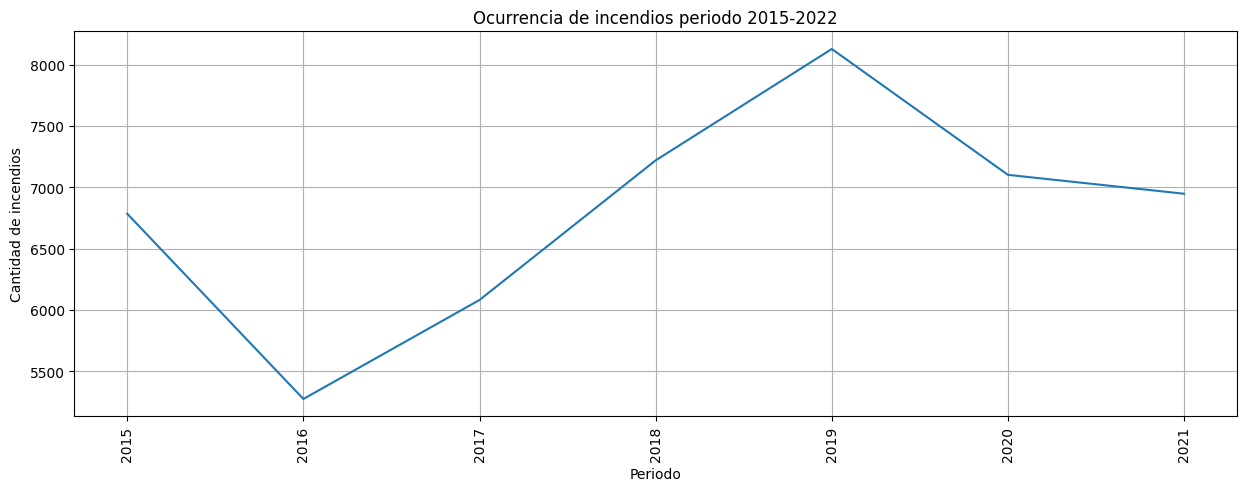

In [96]:
# Graficamos la ocurrencia de incendios periodo 2014-2022
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_ocurrencia_incendios, x="PERIODO", y="TOTAL")
plt.title("Ocurrencia de incendios periodo 2015-2022")
plt.xlabel("Periodo")
plt.ylabel("Cantidad de incendios")
plt.grid()
plt.xticks(rotation=90)
plt.show()


### Análisis Ocurrencia de Incendios 🔥🌲

Podemos apreciar que los incendios han ido en aumento durante este último tiempo, por lo que analizaremos más detalladamente los daños generados por estos incendios.

In [97]:
# Analizamos los daños por incendios en el país
df_danos_superficie['PERIODO'] = df_danos_superficie['PERIODO'].apply(lambda x: int(x.split("-")[0])).unique()
df_danos_superficie = df_danos_superficie[df_danos_superficie['PERIODO'] >= 2015]

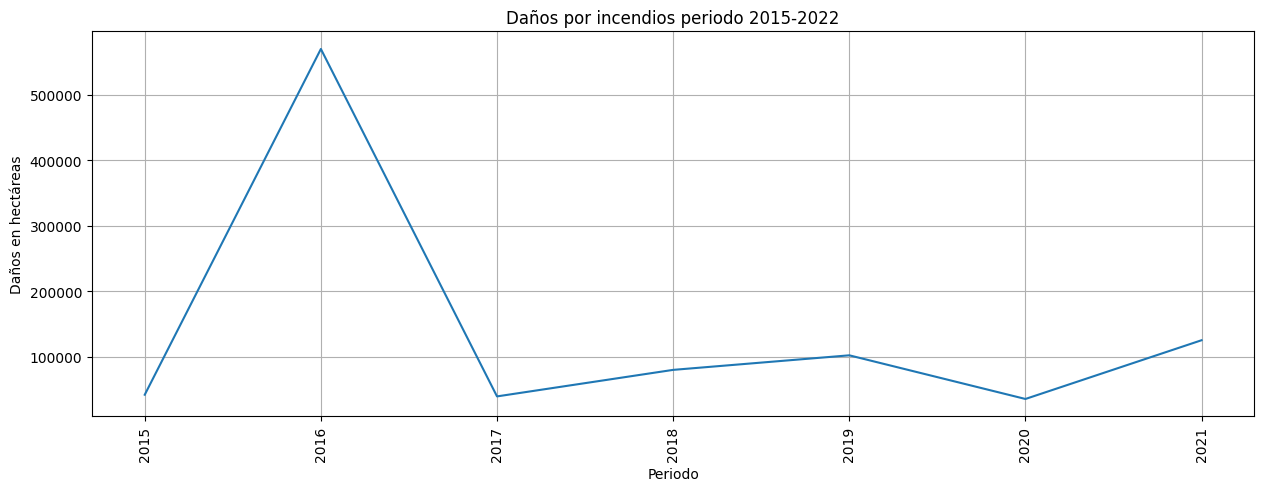

In [98]:
# Graficamos los daños por incendios periodo 2014-2022
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_danos_superficie, x="PERIODO", y="TOTAL")
plt.title("Daños por incendios periodo 2015-2022")
plt.xlabel("Periodo")
plt.ylabel("Daños en hectáreas")
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [99]:
df_danos_superficie[df_danos_superficie["TOTAL"] == df_danos_superficie["TOTAL"].max()]

,PERIODO,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
40,2016,0.5,0.0,0.0,42.24,3639.83,27118.14,53235.73,105542.93,252556.1,0.0,119409.11,8361.48,94.5,127.3,7.54,61.99,570197.0


### Análisis de Daños por Incendios 🔥🌲

Como podemos apreciar, a pesar de existir una ocurrencia de incencios muy baja entre los años 2015-2018, los daños generados por estos incendios son muy altos, por lo que podemos concluir que los incendios que ocurrieron en estos años fueron de gran magnitud. Más específicamente, podemos ver que el año 2016 fue el año con mayor cantidad de incendios y con mayor daño generado por estos, siendo las regiones más afectadas la región del Maule y la región de O'Higgins, junto con la región del Biobío, por lo que éstos serán los focos de nuestro análisis.

### Análisis de Causas de Incendios 🔥🌲

Antes de analizar los incendios en las regiones de O'Higgins, Maule y Biobío, analizaremos las causas de los incendios en Chile, para así poder entender mejor el contexto de los incendios en estas regiones.

In [100]:
df_causas_incendios.head()

,AÑO,ACCIDENTALES,INTENCIONALES,NATURALES,DESCONOCIDAS
0,2003,3820,1714,4,2034
1,2004,3070,1190,23,2147
2,2005,3192,1763,18,1680
3,2006,3258,1741,6,391
4,2007,3286,1463,14,380


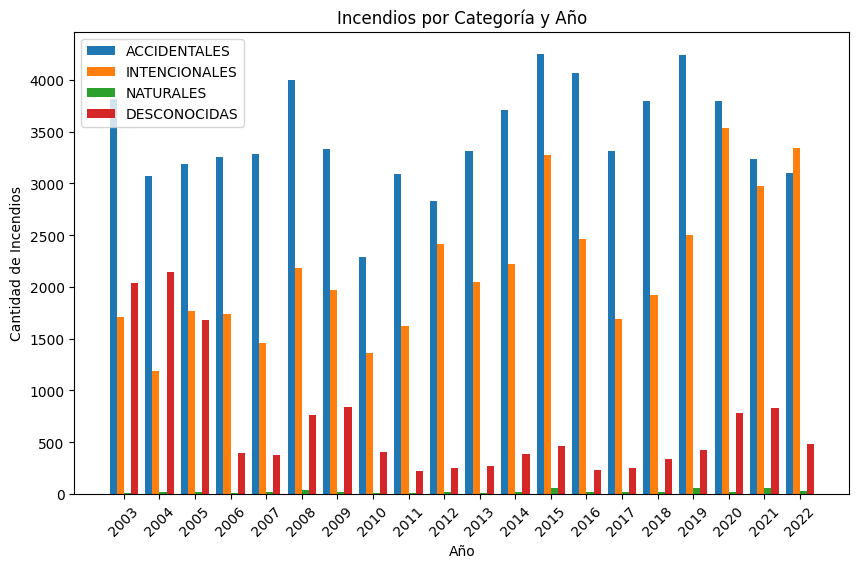

In [101]:
# Graficar los datos
fig, ax = plt.subplots(figsize=(10, 6))

# Barra para cada categoría
bar_width = 0.2
bar_positions = range(len(df_causas_incendios['AÑO']))

# Barra para ACCIDENTALES
plt.bar(bar_positions, df_causas_incendios['ACCIDENTALES'], width=bar_width, label='ACCIDENTALES')

# Barra para INTENCIONALES
plt.bar([p + bar_width for p in bar_positions], df_causas_incendios['INTENCIONALES'], width=bar_width, label='INTENCIONALES')

# Barra para NATURALES
plt.bar([p + 2 * bar_width for p in bar_positions], df_causas_incendios['NATURALES'], width=bar_width, label='NATURALES')

# Barra para DESCONOCIDAS
plt.bar([p + 3 * bar_width for p in bar_positions], df_causas_incendios['DESCONOCIDAS'], width=bar_width, label='DESCONOCIDAS')

# Configurar el eje x
plt.xlabel('Año')
plt.xticks([p + 1.5 * bar_width for p in bar_positions], df_causas_incendios['AÑO'])

# Configurar el eje y
plt.ylabel('Cantidad de Incendios')

# Añadir leyenda
plt.legend()

# Añadir título
plt.title('Incendios por Categoría y Año')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [102]:
df_causas_incendios[df_causas_incendios["ACCIDENTALES"] == df_causas_incendios["ACCIDENTALES"].max()]

,AÑO,ACCIDENTALES,INTENCIONALES,NATURALES,DESCONOCIDAS
12,2015,4252,3273,58,465


Como podemos apreciar, la principal causa de incendios en Chile es de carácter accidental, seguido por la causa intencional, por lo que podemos concluir que la mayoría de los incendios en Chile son causados por el ser humano, algo que pudo haber sido completamente evitable.

## ¿Qué podemos concluir de esto?

Inicialmente, es interesante observar que la mayoría de los incendios provocados fueron atribuibles a actividades humanas, en lugar de causas naturales. Estos datos sugieren que, en muchos casos, la responsabilidad de los incendios recae directamente en las acciones humanas, lo que plantea la cuestión de la relación entre el cambio climático y las actividades humanas, siendo estas últimas un factor determinante en la ocurrencia de incendios.

Durante el periodo 2016-2017, se registró uno de los eventos de incendio forestal más extensos en términos de superficie (de hecho, fue dada a conocer como una tormenta de fuego). Aunque la cantidad total de incendios puede no haber sido significativa, la magnitud y el impacto medioambiental de este suceso fueron notables. Este incidente destacó por su gran tamaño y consecuencias ambientales significativas.

Centrándonos en el impacto medioambiental, es evidente que eventos de gran amplitud, como el ya mencionado, pueden influir en el comportamiento y la diversidad de las aves en la región(es) afectada. La presencia de incendios a gran escala puede alterar tanto el comportamiento como el tipo de aves avistadas en esa área. Esto se debe a que las aves se ven obligadas a emigrar hacia otras zonas para garantizar su supervivencia, o lamentablemente, algunas pueden perecer como resultado del incendio.

En un sentido más general, cada vez que se produce un incendio en una región específica, se observa un impacto directo en la cantidad y diversidad de aves presentes en ese entorno. Este fenómeno subraya la estrecha interconexión entre los incendios forestales y la vida silvestre, evidenciando la necesidad de abordar y gestionar adecuadamente estos eventos para preservar la biodiversidad y el equilibrio ecológico.

### Ahora realizamos la conexion entre incendios y la cantidad de avistamientos con las especies de aves.

Principalmente analizaremos con la cantidad de avistamientos de aves en Chile, y veremos si existe una relación entre la cantidad de avistamientos y la cantidad de incendios o la superficie quemada.


Como las regiones mas afectadas fueron las de O'Higgins, Maule y BioBio, nos enfocaremos en estas para hacer el estudio de cantidad de aves avistadas, haciendo el contraste con el anho 2016 y 2018, respecto a 2017, especificamente los meses de noviembre y marzo

In [103]:
df_danos_mes_2016_2017

,MES,XV,I,II,III,IV,V,RM,VI,VII,VIII,IX,XIV,X,XI,XII
0,JULIO,0.0,0.0,0.0,0.3,0.0,10.0,1.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,AGOSTO,0.0,0.0,0.0,0.2,30.0,21.4,0.0,0.0,2.0,0.4,0.0,0.0,0.0,0.0,6.2
2,SEPTIEMBRE,0.0,0.0,0.0,14.6,16.9,208.9,59.2,4.9,288.1,222.2,119.4,2.3,0.8,0.6,2.6
3,OCTUBRE,0.0,0.0,0.0,14.6,109.1,278.7,663.0,38.3,18.0,23.8,4.5,21.7,0.3,0.4,15.4
4,NOVIEMBRE,0.0,0.0,0.0,0.0,72.0,4097.9,15402.4,7396.8,234.8,323.6,140.6,17.1,4.9,5.3,2.7
5,DICIEMBRE,0.0,0.0,0.0,1.6,165.6,8141.9,5010.5,13565.7,7017.1,878.9,91.5,1.2,4.6,0.3,32.9
6,ENERO,0.5,0.0,0.0,0.0,3165.7,12272.5,31415.1,83063.3,241211.6,114822.5,7226.8,14.1,21.0,0.0,0.6
7,FEBRERO,0.0,0.0,0.0,0.0,16.7,982.1,513.1,443.2,3077.2,2336.5,459.5,68.2,56.5,0.0,1.5
8,MARZO,0.0,0.0,0.0,1.8,19.8,948.2,81.3,973.6,567.0,618.1,274.4,2.0,5.7,0.0,0.0
9,ABRIL,0.0,0.0,0.0,9.2,44.0,103.2,77.1,41.1,115.0,182.3,44.3,0.8,0.8,0.0,0.0


In [104]:
dfs_estudio = pd.concat([df_aves_15, df_aves_16, df_aves_17, df_aves_18])
df1 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2015) & dfs_estudio['obsDt'].dt.month.between(11, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2016) & dfs_estudio['obsDt'].dt.month.between(1, 3))
]
df2 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2016) & dfs_estudio['obsDt'].dt.month.between(11, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2017) & dfs_estudio['obsDt'].dt.month.between(1, 3))
]

df3 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2017) & dfs_estudio['obsDt'].dt.month.between(11, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2018) & dfs_estudio['obsDt'].dt.month.between(1, 3))
]

dfs_estudio = [df1, df2, df3]
for i in range(len(dfs_estudio)):
    #Seleccionamos las regiones que nos interesan
    dfs_estudio[i] = dfs_estudio[i][(dfs_estudio[i]['region'] == 'Bío-Bío') | (dfs_estudio[i]['region'] == 'Maule') | (dfs_estudio[i]['region'] == "Libertador General Bernardo O'Higgins")]
    dfs_estudio[i] = dfs_estudio[i].groupby(by=['region', 'obsDt']).size().reset_index(name='cantidad')

In [105]:
dfs_estudio[0]

,region,obsDt,cantidad
0,Bío-Bío,2015-11-01,4
1,Bío-Bío,2015-11-02,14
2,Bío-Bío,2015-11-03,10
3,Bío-Bío,2015-11-07,12
4,Bío-Bío,2015-11-09,10
...,...,...,...
214,Maule,2016-03-19,1
215,Maule,2016-03-21,9
216,Maule,2016-03-22,21
217,Maule,2016-03-23,21


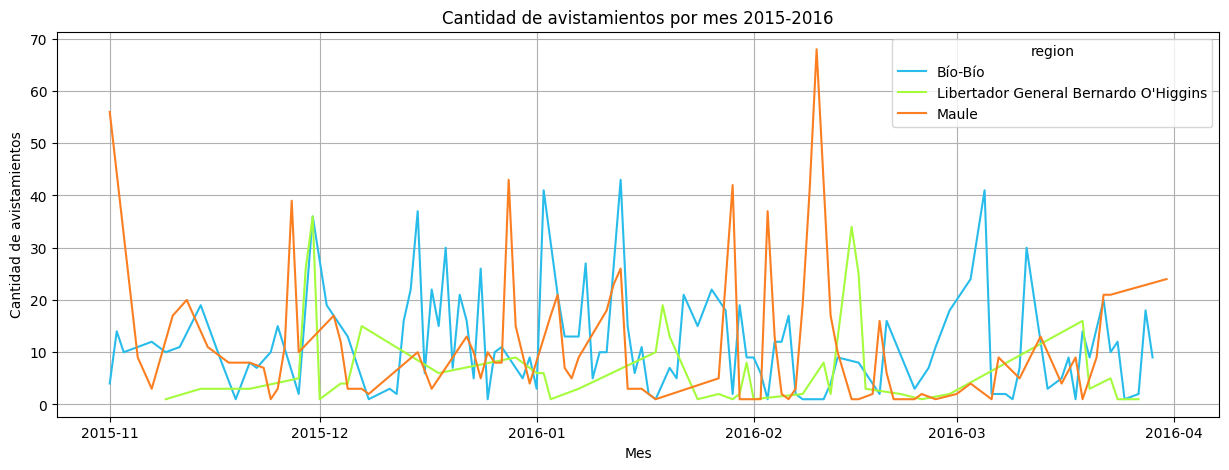

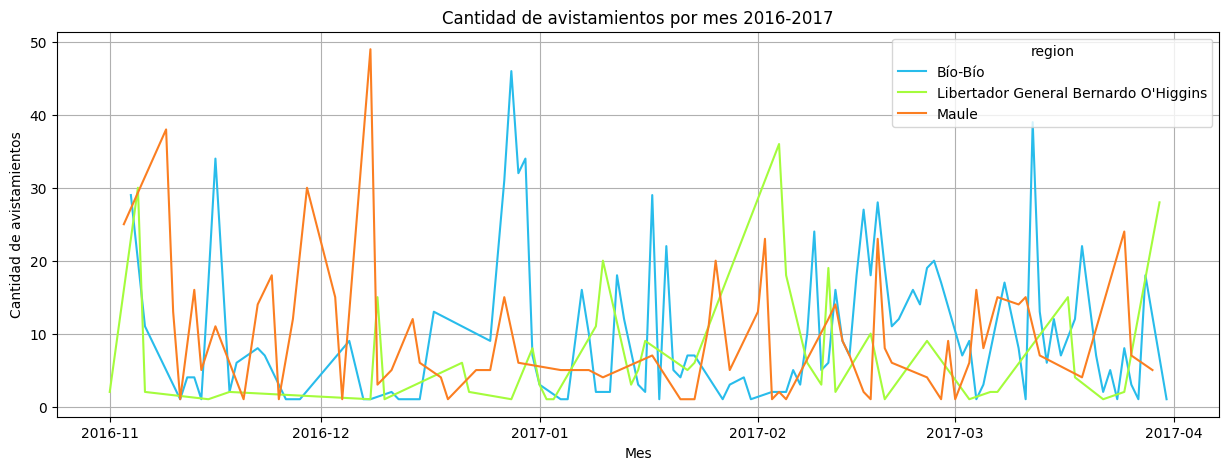

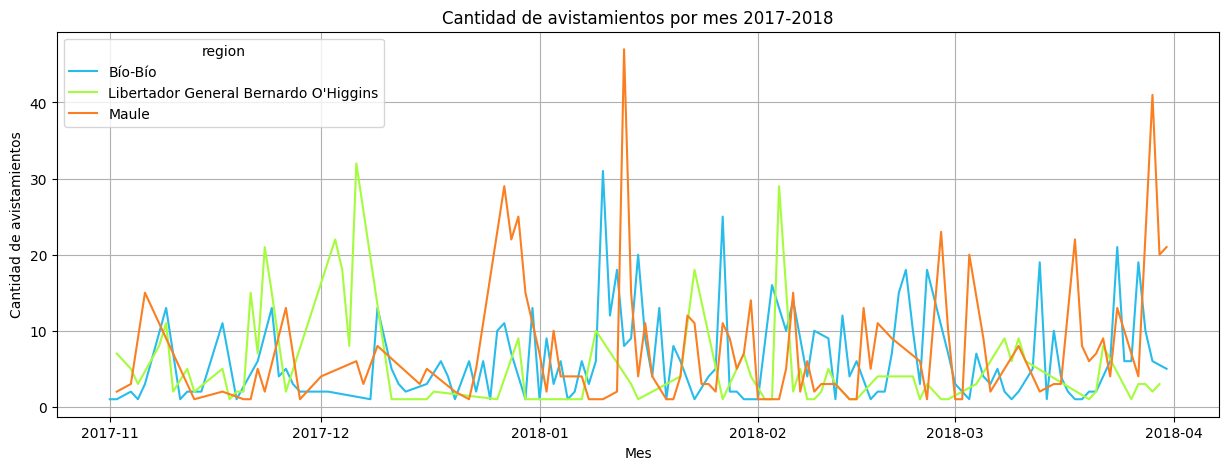

In [106]:
for df in dfs_estudio:
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=df, x=df['obsDt'], y="cantidad", hue="region", palette='turbo', ci=None)
    plt.title(f"Cantidad de avistamientos por mes {df['obsDt'].dt.year.unique()[0]}-{df['obsDt'].dt.year.unique()[1]}")
    plt.xlabel("Mes")
    plt.ylabel("Cantidad de avistamientos")
    plt.grid(True)


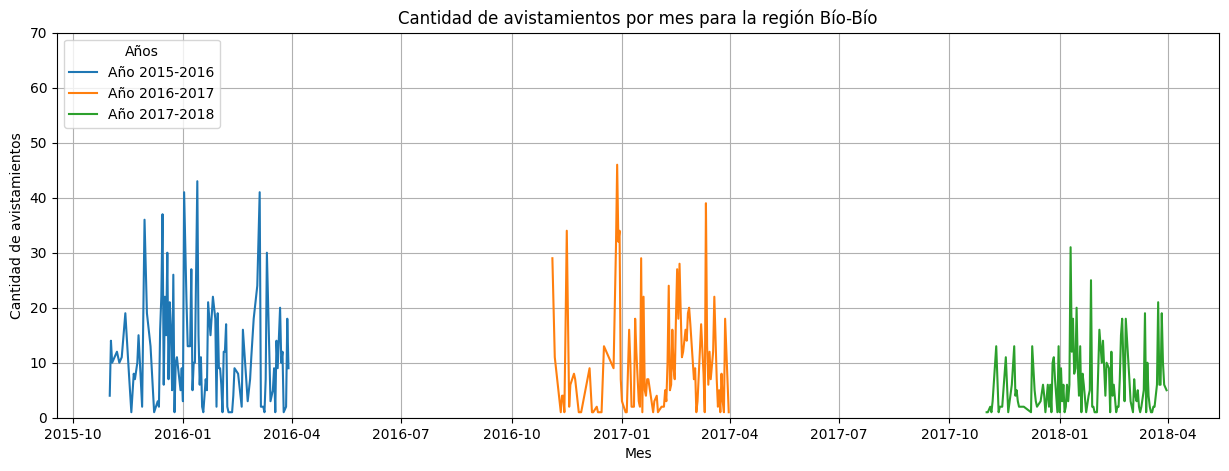

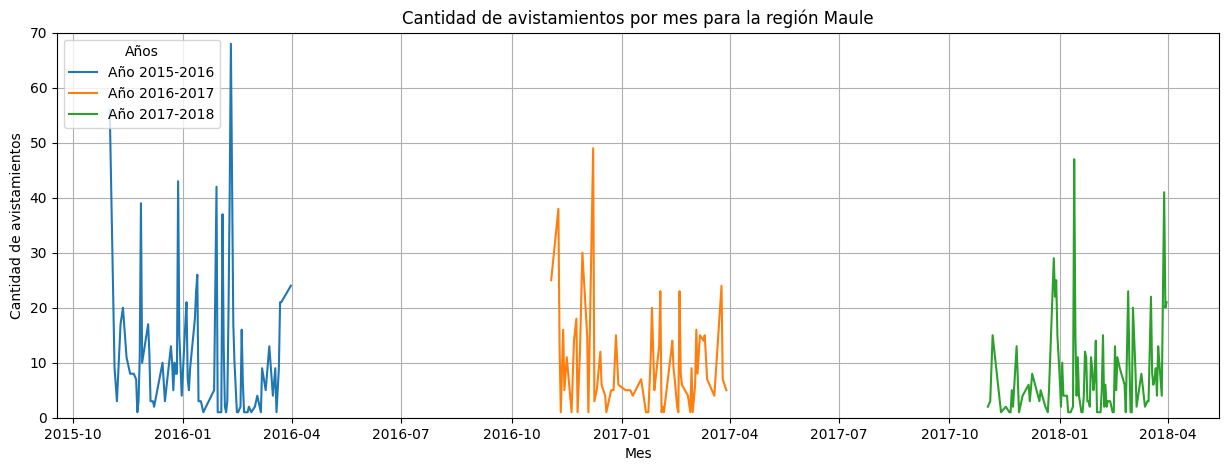

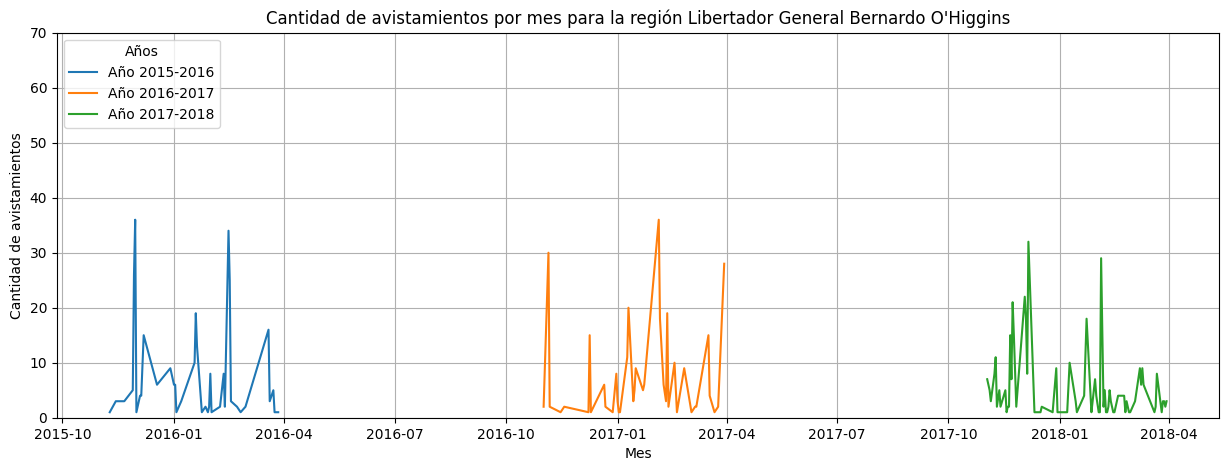

In [107]:
regions_of_interest = ['Bío-Bío', 'Maule', "Libertador General Bernardo O'Higgins"]

for region in regions_of_interest:
    plt.figure(figsize=(15, 5))
    plt.title(f"Cantidad de avistamientos por mes para la región {region}")

    for df in dfs_estudio:
        # Filtrar por región
        df_region = df[df['region'] == region]

        # Crear el gráfico de líneas
        sns.lineplot(data=df_region, x=df_region['obsDt'], y="cantidad", label=f"Año {df_region['obsDt'].dt.year.unique()[0]}-{df_region['obsDt'].dt.year.unique()[1]}")

    plt.xlabel("Mes")
    plt.ylim(0, 70)
    plt.ylabel("Cantidad de avistamientos")
    plt.legend(title='Años', loc='upper left')
    plt.grid(True)

plt.show()


Analizando los gráficos por mes y relacionados con cada una de las regiones, podemos ver que existe una disminución de avistamientos de aves en el mes de enero para el año 2017, esto se puede deber a que en este mes se produjo el incendio forestal más grande de la historia de Chile, el cual afectó principalmente a las regiones de O'Higgins, Maule y BioBio, por lo que podemos concluir que los incendios forestales afectan directamente a la cantidad de aves avistadas en Chile.

Como la region del Maule fue la mas afectada, nos enfocaremos en esta region para ver mas a fondo las especies afectadas

In [108]:
dfs_estudio = pd.concat([df_aves_15, df_aves_16, df_aves_17, df_aves_18])
dfs_estudio = dfs_estudio[(dfs_estudio['region'] == 'Bío-Bío') | (dfs_estudio['region'] == 'Maule') | (dfs_estudio['region'] == "Libertador General Bernardo O'Higgins")]

#2015-2016
df1 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2015) & dfs_estudio['obsDt'].dt.month.between(12, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2016) & dfs_estudio['obsDt'].dt.month.between(1, 2))
    ]
#2016-2017
df2 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2016) & dfs_estudio['obsDt'].dt.month.between(12, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2017) & dfs_estudio['obsDt'].dt.month.between(1, 2))
    ]
#2017-2018
df3 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2017) & dfs_estudio['obsDt'].dt.month.between(12, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2018) & dfs_estudio['obsDt'].dt.month.between(1, 2))
    ]

dfs_estudio = [df1, df2, df3]
df1 = df1.groupby(by="sciName").sum('howMany').reset_index()
df1 = df1[['sciName', 'howMany']].sort_values(by="howMany", ascending=False)
df2 = df2.groupby(by="sciName").sum('howMany').reset_index()
df2 = df2[['sciName', 'howMany']].sort_values(by="howMany", ascending=False)
df3 = df3.groupby(by="sciName").sum('howMany').reset_index()
df3 = df3[['sciName', 'howMany']].sort_values(by="howMany", ascending=False)

In [109]:
#Calculamos el promedio de los fechas que nos interesa hacer el contraste
df_prom = pd.merge(df1, df3, on="sciName", how="inner")
df_prom['vis_prom'] = (df_prom['howMany_x'] + df_prom['howMany_y']) / 2
df_prom = df_prom[['sciName', 'vis_prom']]
df_prom

,sciName,vis_prom
0,Ardenna grisea,5619.5
1,Leucophaeus pipixcan,1576.0
2,Rynchops niger,885.0
3,Ardenna creatopus,1052.5
4,Pelecanoides garnotii,596.0
...,...,...
172,Thinocorus orbignyianus,15.5
173,Daptrius megalopterus,1.5
174,Anas platyrhynchos,5.0
175,Charadrius collaris,5.0


In [110]:
#Restamos el promedio con el año 2016-2017, donde hubieron mas incencios
diff = pd.merge(df_prom, df2, on="sciName", how="inner")
diff['diff'] = diff['howMany'] - diff['vis_prom']
diff = diff[['sciName', 'diff']].sort_values(by="diff", ascending=False)
diff

,sciName,diff
0,Ardenna grisea,94971.5
3,Ardenna creatopus,64938.5
1,Leucophaeus pipixcan,3284.0
17,Cyanoliseus patagonus,508.0
6,Chroicocephalus maculipennis,217.0
...,...,...
108,Bubulcus ibis,-364.5
7,Fulica leucoptera,-381.5
16,Fulica armillata,-385.0
5,Anas georgica,-505.5


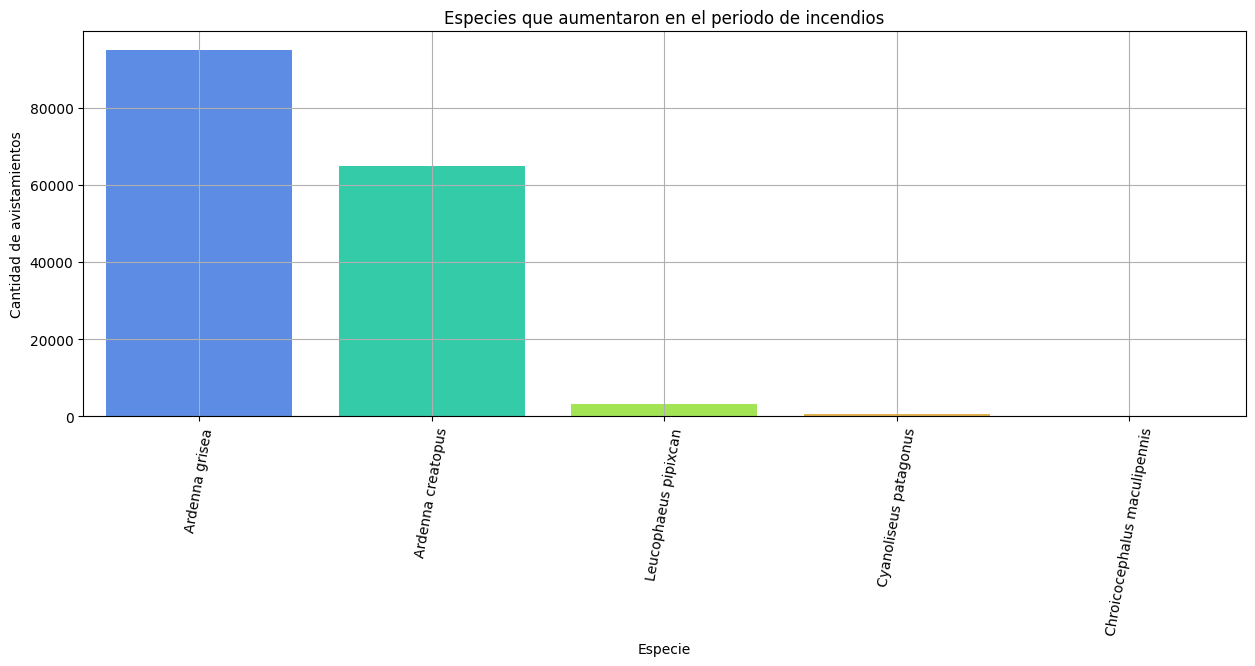

In [111]:
#Ahora plotemos las especies mas avistadas en la region del maule
plt.figure(figsize=(15, 5))
sns.barplot(data=diff.head(), x="sciName", y="diff", palette='turbo')
plt.title("Especies que aumentaron en el periodo de incendios")
plt.xlabel("Especie")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=80)
plt.show()


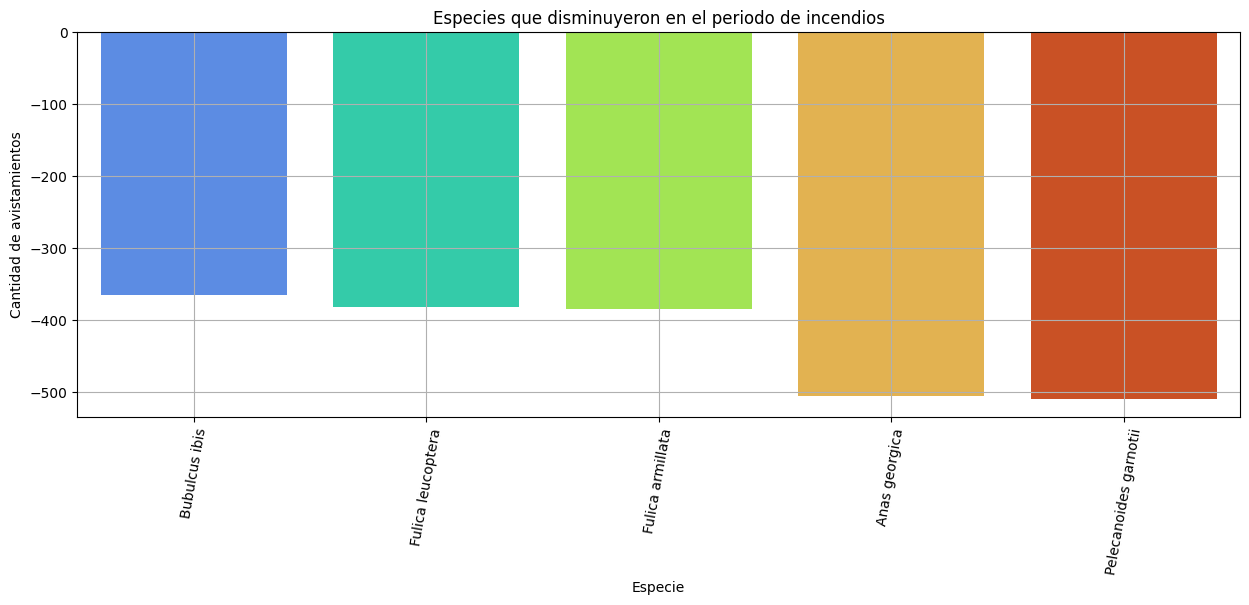

In [112]:
#Ahora plotemos las especies mas avistadas en la region del maule
plt.figure(figsize=(15, 5))
sns.barplot(data=diff.tail(), x="sciName", y="diff", palette='turbo')
plt.title("Especies que disminuyeron en el periodo de incendios")
plt.xlabel("Especie")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=80)
plt.show()


En general, durante épocas de incendios forestales, la presencia de aves marinas puede disminuir debido a varios factores. Los incendios pueden afectar el hábitat y la disponibilidad de alimentos, causar desplazamientos de las aves a áreas menos afectadas, generar contaminantes en el aire y agua, y afectar colonias de anidación cercanas. Sin embargo, el impacto puede variar según la especie y las condiciones específicas de los incendios. Para obtener información más precisa, se recomienda consultar estudios científicos locales o hablar con expertos en ornitología y ecología marina.

In [113]:
dfs_estudio = pd.concat([df_aves_15, df_aves_16, df_aves_17, df_aves_18])
dfs_estudio = dfs_estudio[(dfs_estudio['region'] == 'Maule')]

#filtrar meses de 11 a 3
dfs_estudio = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2015) & dfs_estudio['obsDt'].dt.month.between(11, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2016) & dfs_estudio['obsDt'].dt.month.between(1, 3))
]
dfs_estudio

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
34350,eardov1,Eared Dove,Zenaida auriculata,L3984918,"CL-Maule-San Rafael-CH-5 - -35,2408x-71,4552",2015-11-01,1.0,-35.240750,-71.455161,True,-1,Maule
34351,soulap1,Southern Lapwing,Vanellus chilensis,L3984918,"CL-Maule-San Rafael-CH-5 - -35,2408x-71,4552",2015-11-01,3.0,-35.240750,-71.455161,True,-1,Maule
34352,chicar1,Chimango Caracara,Daptrius chimango,L3984918,"CL-Maule-San Rafael-CH-5 - -35,2408x-71,4552",2015-11-01,1.0,-35.240750,-71.455161,True,-1,Maule
34353,chimoc1,Chilean Mockingbird,Mimus thenca,L3984918,"CL-Maule-San Rafael-CH-5 - -35,2408x-71,4552",2015-11-01,2.0,-35.240750,-71.455161,True,-1,Maule
34354,houspa,House Sparrow,Passer domesticus,L3984918,"CL-Maule-San Rafael-CH-5 - -35,2408x-71,4552",2015-11-01,3.0,-35.240750,-71.455161,True,0,Maule
...,...,...,...,...,...,...,...,...,...,...,...,...
13435,yebtea1,Yellow-billed Teal,Anas flavirostris,L2147880,Río Claro--Talca,2016-03-31,4.0,-35.418258,-71.683516,False,-1,Maule
13436,cocher1,Cocoi Heron,Ardea cocoi,L2147880,Río Claro--Talca,2016-03-31,1.0,-35.418258,-71.683516,False,-1,Maule
13437,greegr,Great Egret,Ardea alba,L2147880,Río Claro--Talca,2016-03-31,1.0,-35.418258,-71.683516,False,-1,Maule
13438,snoegr,Snowy Egret,Egretta thula,L2147880,Río Claro--Talca,2016-03-31,6.0,-35.418258,-71.683516,False,-1,Maule


Ahora agruparemos las especies por su cantidad de avistamientos.

In [114]:
#Agruparemos por especie  (Este es en la region del maule)
#Tambien hay que tener en consideracion que el periodo de tiempo es desde noviembre del 2015 hasta marzo del 2016

dfs_agrupacion_especies = dfs_estudio.groupby(by=['comName', 'sciName']).sum('howMany').reset_index().sort_values(by="howMany", ascending=False)
dfs_agrupacion_especies


,comName,sciName,howMany,lat,lng,locationPrivate,exoticCategory
130,Sooty Shearwater,Ardenna grisea,4031.0,-106.578468,-217.975002,2,-3
159,Yellow-billed Pintail,Anas georgica,827.0,-246.824141,-502.688155,2,-7
15,Black Skimmer,Rynchops niger,649.0,-140.950152,-289.398122,0,-4
27,Brown-hooded Gull,Chroicocephalus maculipennis,513.0,-211.621372,-434.042268,2,-6
60,Elegant Tern,Thalasseus elegans,479.0,-212.369762,-434.582019,1,-6
...,...,...,...,...,...,...,...
131,South American Tern,Sterna hirundinacea,1.0,-35.118926,-72.208586,0,-1
96,Parasitic Jaeger,Stercorarius parasiticus,1.0,-35.586734,-73.175009,1,-1
80,Juan Fernandez Petrel,Pterodroma externa,1.0,-35.424764,-73.084048,1,-1
138,Swallow-tailed Gull,Creagrus furcatus,1.0,-35.319747,-72.405181,0,-1


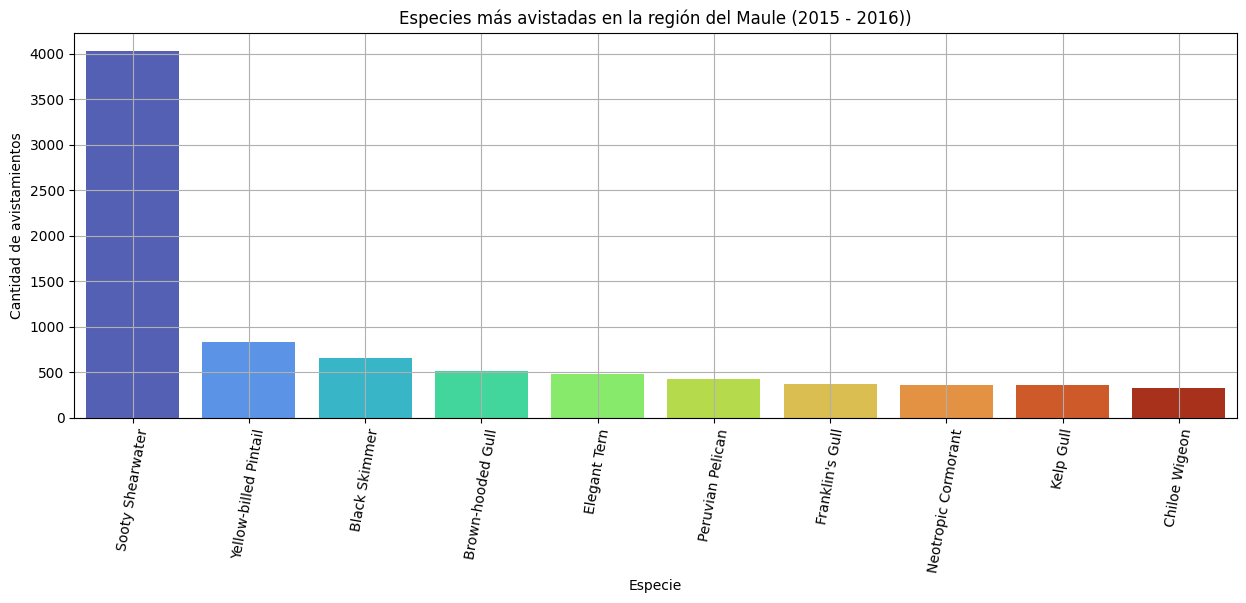

In [115]:
#Ahora plotemos las especies mas avistadas en la region del maule
plt.figure(figsize=(15, 5))
sns.barplot(data=dfs_agrupacion_especies.head(10), x="comName", y="howMany", palette='turbo')
plt.title("Especies más avistadas en la región del Maule (2015 - 2016))")
plt.xlabel("Especie")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=80)
plt.show()


In [116]:
dfs_estudio = pd.concat([df_aves_15, df_aves_16, df_aves_17, df_aves_18])
dfs_estudio = dfs_estudio[(dfs_estudio['region'] == 'Maule')]

#filtrar meses de 11 a 3
dfs_estudio = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2016) & dfs_estudio['obsDt'].dt.month.between(11, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2017) & dfs_estudio['obsDt'].dt.month.between(1, 3))
]

In [117]:

dfs_agrupacion_especies = dfs_estudio.groupby(by=['comName', 'sciName']).sum('howMany').reset_index().sort_values(by="howMany", ascending=False)
dfs_agrupacion_especies


,comName,sciName,howMany,lat,lng,locationPrivate,exoticCategory
72,Kelp Gull,Larus dominicanus,2003.0,-106.431920,-214.561872,1,-3
14,Black Skimmer,Rynchops niger,743.0,-69.981820,-144.365158,0,-2
1,American Oystercatcher,Haematopus palliatus,581.0,-34.990910,-72.182579,0,-1
27,Burrowing Parakeet,Cyanoliseus patagonus,508.0,-642.579726,-1280.773463,7,-18
128,Whimbrel,Numenius phaeopus,403.0,-34.990910,-72.182579,0,-1
...,...,...,...,...,...,...,...
109,Semipalmated Sandpiper,Calidris pusilla,1.0,-34.990910,-72.182579,0,-1
17,Black-billed Shrike-Tyrant,Agriornis montanus,1.0,-35.603509,-70.988159,0,-1
110,Sharp-billed Canastero,Asthenes pyrrholeuca,0.0,-35.823394,-70.761337,0,-1
57,Grass Wren,Cistothorus platensis,0.0,-35.155390,-72.246780,0,-1


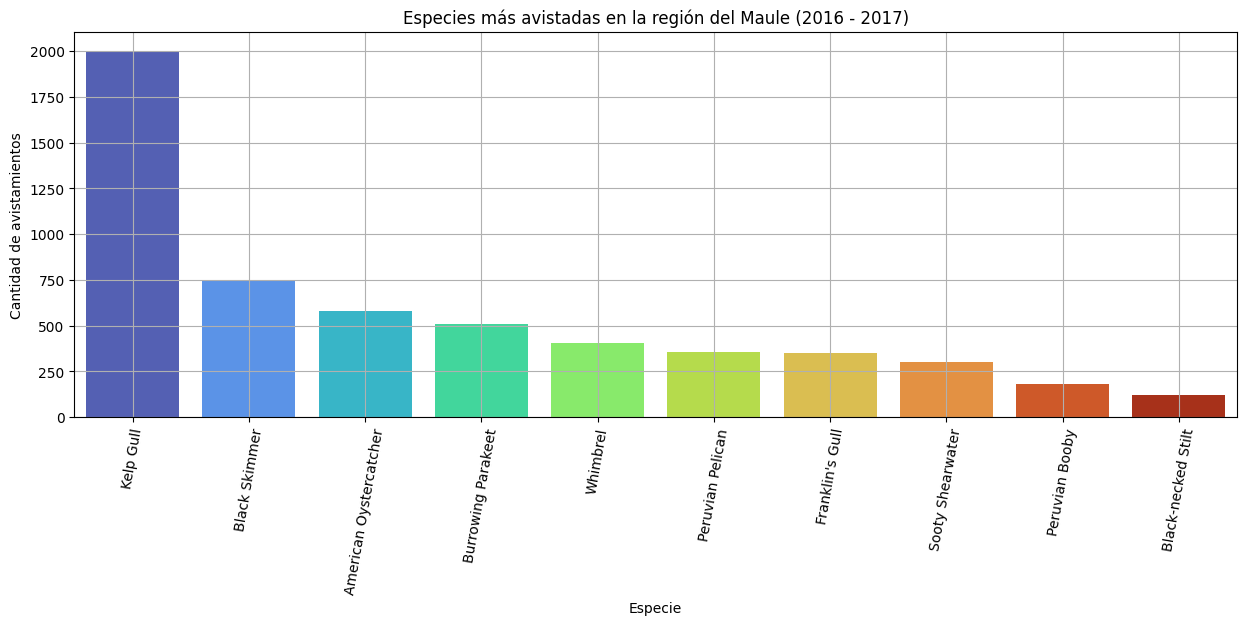

In [118]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dfs_agrupacion_especies.head(10), x="comName", y="howMany", palette='turbo')
plt.title("Especies más avistadas en la región del Maule (2016 - 2017)")
plt.xlabel("Especie")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=80)
plt.show()


In [119]:
dfs_estudio = pd.concat([df_aves_15, df_aves_16, df_aves_17, df_aves_18])
dfs_estudio = dfs_estudio[(dfs_estudio['region'] == 'Maule')]

#filtrar meses de 11 a 3
dfs_estudio = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2017) & dfs_estudio['obsDt'].dt.month.between(11, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2018) & dfs_estudio['obsDt'].dt.month.between(1, 3))
]

In [120]:

dfs_agrupacion_especies = dfs_estudio.groupby(by=['comName', 'sciName']).sum('howMany').reset_index().sort_values(by="howMany", ascending=False)
dfs_agrupacion_especies

,comName,sciName,howMany,lat,lng,locationPrivate,exoticCategory
125,Sooty Shearwater,Ardenna grisea,1105.0,-107.156521,-217.814295,3,-3
31,Cattle Egret,Bubulcus ibis,767.0,-247.773363,-501.322117,5,-7
29,Burrowing Parakeet,Cyanoliseus patagonus,587.0,-748.188186,-1494.413298,4,-21
108,Red-gartered Coot,Fulica armillata,580.0,-142.576799,-285.211998,0,-4
156,Yellow-billed Pintail,Anas georgica,462.0,-142.999356,-286.261858,0,-4
...,...,...,...,...,...,...,...
50,Croaking Ground Dove,Columbina cruziana,1.0,-27.901594,-70.959712,0,-1
72,Harris's Hawk,Parabuteo unicinctus,1.0,-35.743257,-71.008620,0,-1
18,Black-chinned Siskin,Spinus barbatus,0.0,-35.429672,-71.601299,1,-1
22,Black-necked Swan,Cygnus melancoryphus,0.0,-34.771653,-72.041903,0,-1


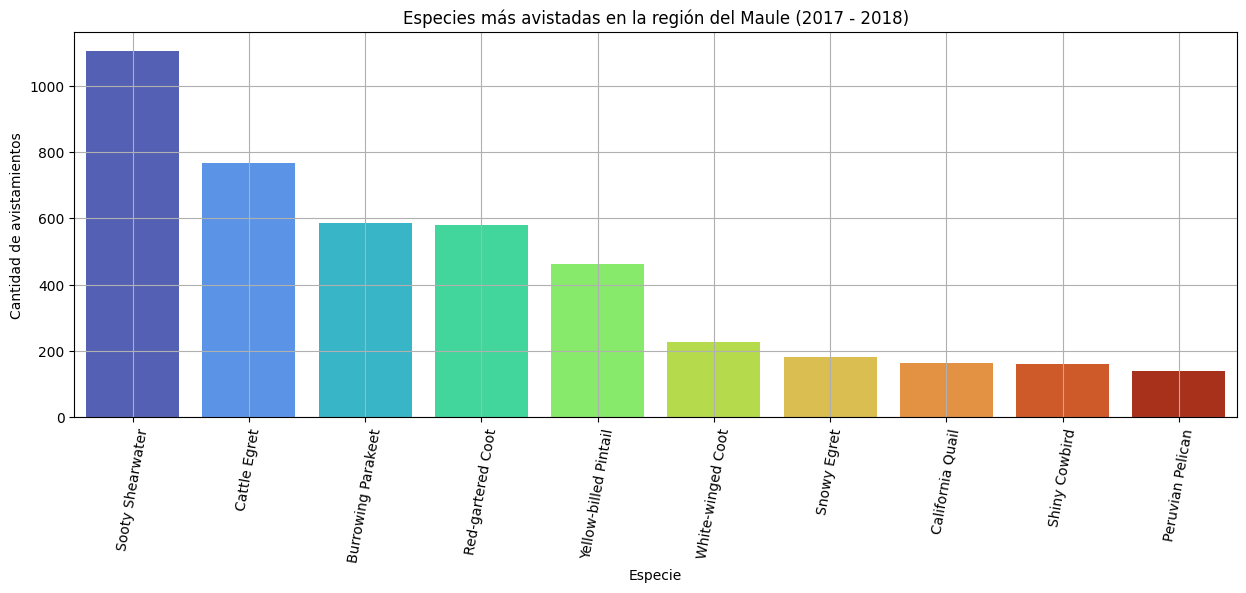

In [121]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dfs_agrupacion_especies.head(10), x="comName", y="howMany", palette='turbo')
plt.title("Especies más avistadas en la región del Maule (2017 - 2018)")
plt.xlabel("Especie")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=80)
plt.show()


Si nos percatamos, encontramos un patrón, en el periodo de noviembre a marzo de 2015 - 2016, nos fijamos que la especie Sooty Shearwater es la mas abundante, por lo que es importante notar como en el año siguiente, es decir, en el periodo de noviembre a marzo 2016 - 2017, la especie Sooty Shearwater disminuye considerablemente, para luego en el siguiente año aumentar nuevamente la cantidad de avistamientos, por lo que podemos concluir que los incendios forestales afectan directamente a la cantidad de aves avistadas, principalmente a esta especie.

#### Espacio para graficos 

### Ploteo por mes y region

In [122]:
#ahora ploteamos por mes
def ploteo_aves_mes(region, mes):
    plt.figure(figsize=(15, 5))
    print(dfs_estudio['obsDt'].dt.month == mes)
    sns.scatterplot(data=dfs_estudio[(dfs_estudio['region'] == region) & (dfs_estudio['obsDt'].dt.month == mes)].head(20), x="comName", y="howMany", color='red')
    plt.xticks(rotation=80)

40936    False
40937    False
41358    False
41359    False
41360    False
         ...  
15418    False
15423    False
15424    False
15425    False
15426    False
Name: obsDt, Length: 714, dtype: bool


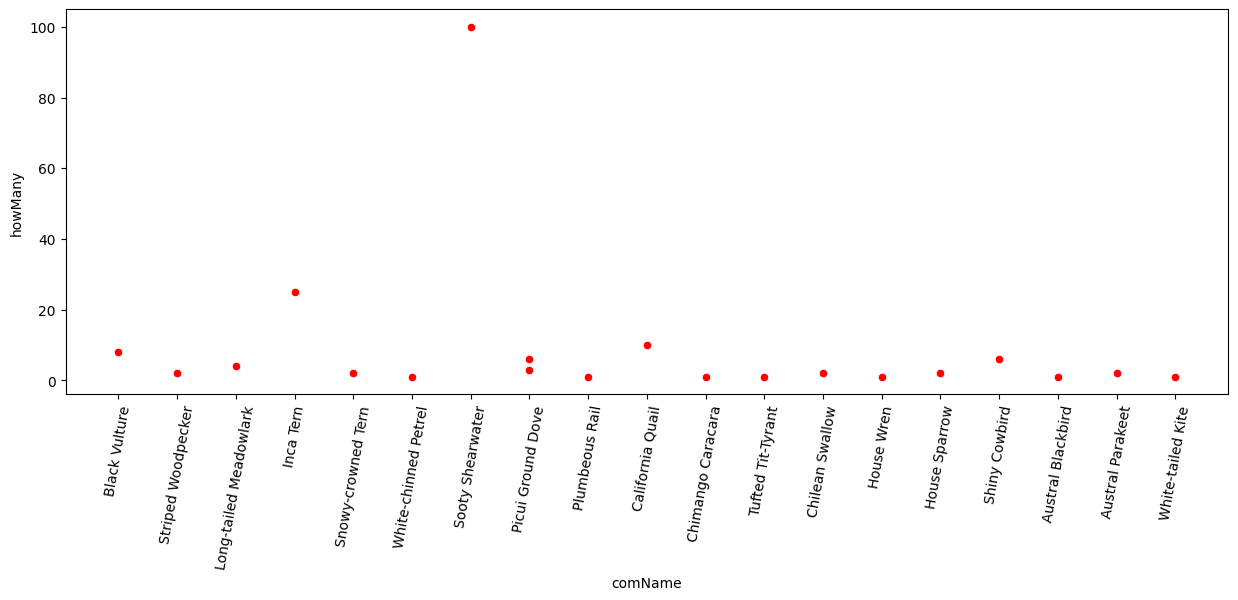

In [123]:
ploteo_aves_mes('Maule', 1)

### Ploteo por año

In [124]:
#hacemos scatter plot con todos los dataframes de aves siendo estos desde el 2015 al 2022
#ploteo por años
def ploteo_aves(region):
    plt.figure(figsize=(15, 5))
    sns.scatterplot(data=df_aves_16[df_aves_16['region'] == region].head(10), x="comName", y="howMany", color='blue', label='2016')
    sns.scatterplot(data=df_aves_17[df_aves_17['region'] == region].head(10), x="comName", y="howMany", color='green', label='2017')
    sns.scatterplot(data=df_aves_18[df_aves_18['region'] == region].head(10), x="comName", y="howMany", color='orange', label='2018')
    plt.title("Aves más vistas en Chile (Region :" + region + ")")
    plt.xlabel("Aves")
    plt.ylabel("Cantidad de avistamientos")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

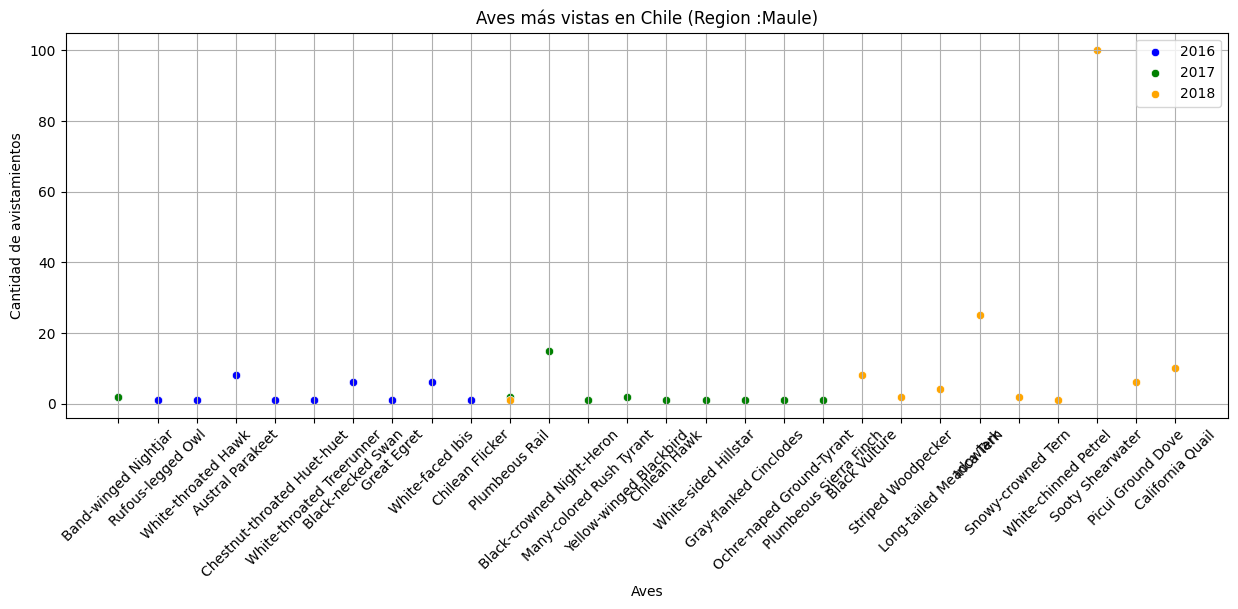

In [125]:
ploteo_aves('Maule')

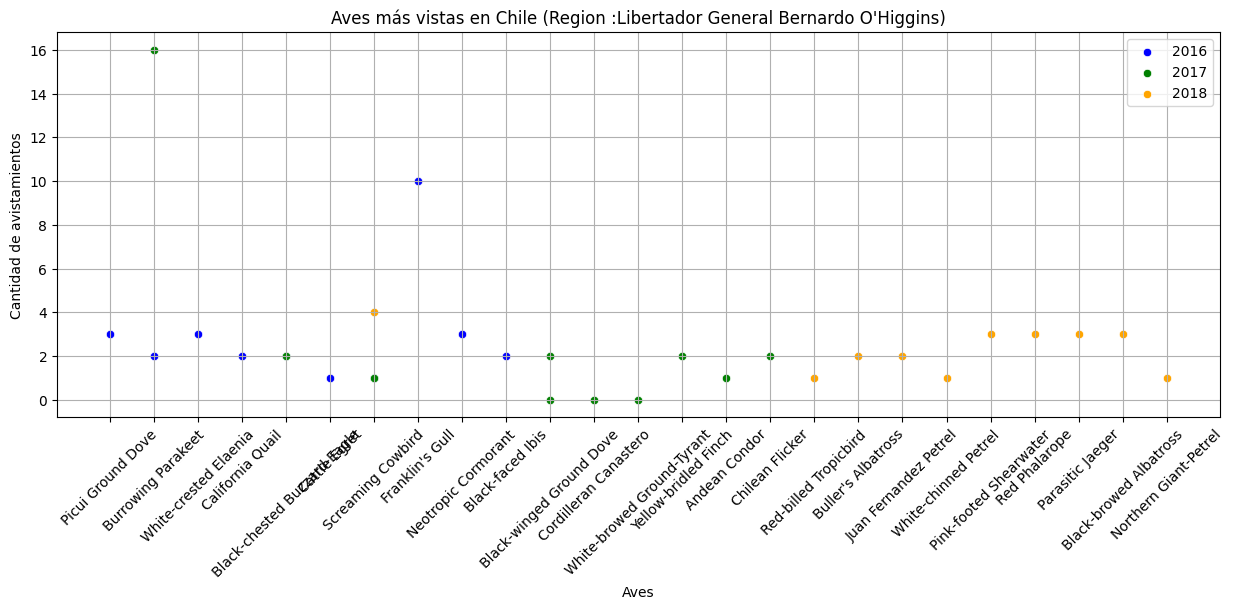

In [126]:
ploteo_aves('Libertador General Bernardo O\'Higgins')

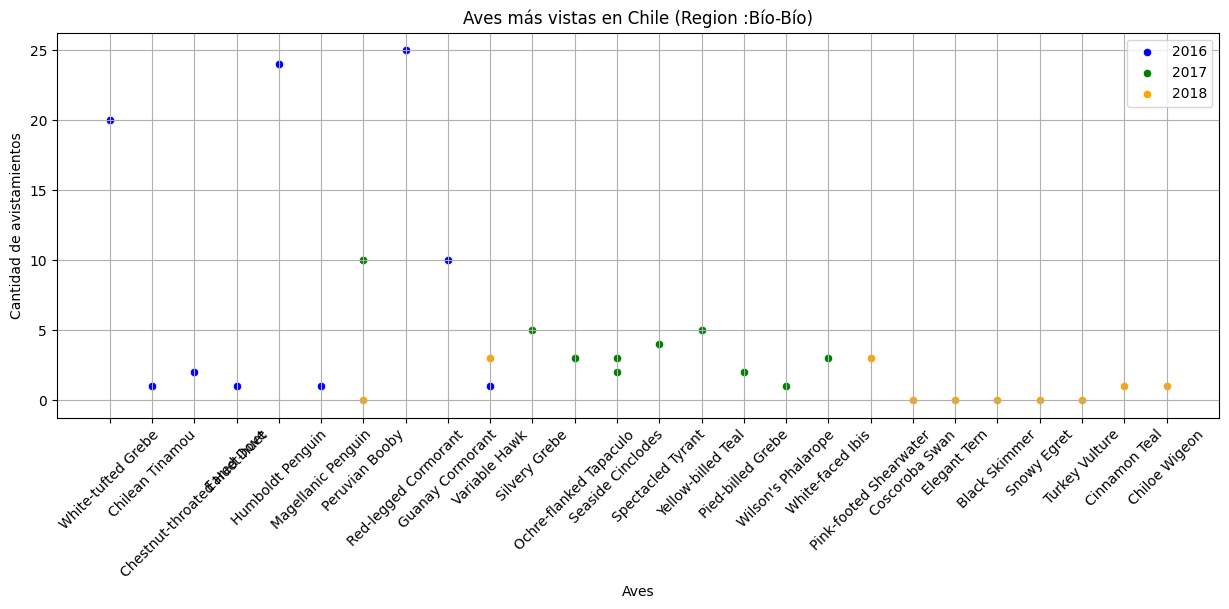

In [127]:
ploteo_aves('Bío-Bío')

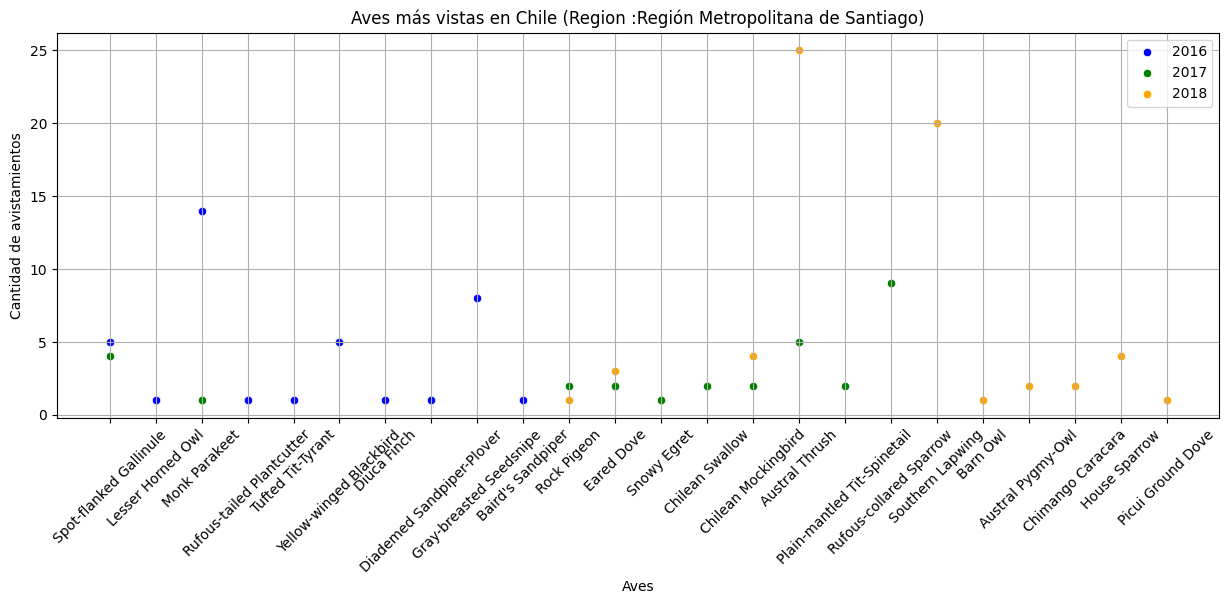

In [128]:
ploteo_aves('Región Metropolitana de Santiago')

Divideremos en 3 partes, zona norte, centro y sur

In [129]:
unificado = pd.concat([df_aves_15, df_aves_16, df_aves_17, df_aves_18, df_aves_19, df_aves_20, df_aves_21, df_aves_22])
unificado

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
0,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3247303,phm,2015-01-01,1.0,-31.784164,-70.536299,True,-1,Coquimbo
1,bkbsht1,Black-billed Shrike-Tyrant,Agriornis montanus,L3247303,phm,2015-01-01,1.0,-31.784164,-70.536299,True,-1,Coquimbo
2,yersis1,Yellow-rumped Siskin,Spinus uropygialis,L3247303,phm,2015-01-01,2.0,-31.784164,-70.536299,True,-1,Coquimbo
3,gyhsif1,Gray-hooded Sierra Finch,Phrygilus gayi,L3247303,phm,2015-01-01,3.0,-31.784164,-70.536299,True,-1,Coquimbo
4,yebpin1,Yellow-billed Pintail,Anas georgica,L2973546,Desembocadura del estero culebron,2015-01-01,3.0,-29.959684,-71.321301,True,-1,Coquimbo
...,...,...,...,...,...,...,...,...,...,...,...,...
71554,bulshe,Buller's Shearwater,Ardenna bulleri,L570174,Quintero--Pelágico,2022-12-31,1.0,-32.769378,-71.583824,False,-1,Valparaíso
71555,manshe,Manx Shearwater,Puffinus puffinus,L570174,Quintero--Pelágico,2022-12-31,1.0,-32.769378,-71.583824,False,-1,Valparaíso
71556,siltea1,Silver Teal,Spatula versicolor,L6517732,"Huitag, Lago Calafquén",2022-12-31,2.0,-39.516932,-72.275164,True,-1,Los Ríos
71557,dowcra1,Dot-winged Crake,Porzana spiloptera,L6517732,"Huitag, Lago Calafquén",2022-12-31,2.0,-39.516932,-72.275164,True,-1,Los Ríos


In [130]:
tax = tax[['FAMILY_SCI_NAME', 'SCIENTIFIC_NAME']]

In [131]:
unificado = pd.merge(unificado, tax, left_on="sciName", right_on='SCIENTIFIC_NAME', how='inner')
unificado

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region,FAMILY_SCI_NAME,SCIENTIFIC_NAME
0,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3247303,phm,2015-01-01,1.0,-31.784164,-70.536299,True,-1,Coquimbo,Trochilidae,Oreotrochilus leucopleurus
1,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L12342967,Cascada de los Vientos,2015-01-03,3.0,-33.727193,-70.291279,True,-1,Región Metropolitana de Santiago,Trochilidae,Oreotrochilus leucopleurus
2,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3268372,Cerro La Cruz--Cumbre,2015-01-04,2.0,-33.475312,-70.471909,False,-1,Región Metropolitana de Santiago,Trochilidae,Oreotrochilus leucopleurus
3,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L1062972,Parque Andino Juncal,2015-01-05,3.0,-32.915954,-70.092623,False,-1,Valparaíso,Trochilidae,Oreotrochilus leucopleurus
4,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L1147111,Farellones,2015-01-07,1.0,-33.352039,-70.312929,False,-1,Región Metropolitana de Santiago,Trochilidae,Oreotrochilus leucopleurus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326863,jabiru,Jabiru,Jabiru mycteria,L668852,Río Lluta--Desembocadura,2022-12-23,1.0,-18.416539,-70.322408,False,-1,Arica y Parinacota,Ciconiidae,Jabiru mycteria
326864,jabiru,Jabiru,Jabiru mycteria,L668852,Río Lluta--Desembocadura,2022-12-25,1.0,-18.416539,-70.322408,False,-1,Arica y Parinacota,Ciconiidae,Jabiru mycteria
326865,jabiru,Jabiru,Jabiru mycteria,L668852,Río Lluta--Desembocadura,2022-12-26,1.0,-18.416539,-70.322408,False,-1,Arica y Parinacota,Ciconiidae,Jabiru mycteria
326866,jabiru,Jabiru,Jabiru mycteria,L21938859,"A-210, Arica, Arica y Parinacota, CL (-18,421,...",2022-12-27,1.0,-18.421091,-70.319230,True,-1,Arica y Parinacota,Ciconiidae,Jabiru mycteria


In [132]:
norte = unificado[(unificado['region'] == 'Arica y Parinacota') | 
                  (unificado['region'] == 'Tarapacá') |
                  (unificado['region'] == 'Antofagasta') | 
                  (unificado['region'] == 'Atacama') | 
                  (unificado['region'] == 'Coquimbo')
                  ]
norte

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region,FAMILY_SCI_NAME,SCIENTIFIC_NAME
0,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3247303,phm,2015-01-01,1.0,-31.784164,-70.536299,True,-1,Coquimbo,Trochilidae,Oreotrochilus leucopleurus
11,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3247303,phm,2015-01-23,1.0,-31.784164,-70.536299,True,-1,Coquimbo,Trochilidae,Oreotrochilus leucopleurus
18,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3344303,La Colorada,2015-02-04,2.0,-30.260846,-70.001106,True,-1,Coquimbo,Trochilidae,Oreotrochilus leucopleurus
21,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3226371,La Colorada,2015-02-09,3.0,-30.261574,-69.995299,True,-1,Coquimbo,Trochilidae,Oreotrochilus leucopleurus
31,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3247303,phm,2015-03-12,1.0,-31.784164,-70.536299,True,-1,Coquimbo,Trochilidae,Oreotrochilus leucopleurus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326863,jabiru,Jabiru,Jabiru mycteria,L668852,Río Lluta--Desembocadura,2022-12-23,1.0,-18.416539,-70.322408,False,-1,Arica y Parinacota,Ciconiidae,Jabiru mycteria
326864,jabiru,Jabiru,Jabiru mycteria,L668852,Río Lluta--Desembocadura,2022-12-25,1.0,-18.416539,-70.322408,False,-1,Arica y Parinacota,Ciconiidae,Jabiru mycteria
326865,jabiru,Jabiru,Jabiru mycteria,L668852,Río Lluta--Desembocadura,2022-12-26,1.0,-18.416539,-70.322408,False,-1,Arica y Parinacota,Ciconiidae,Jabiru mycteria
326866,jabiru,Jabiru,Jabiru mycteria,L21938859,"A-210, Arica, Arica y Parinacota, CL (-18,421,...",2022-12-27,1.0,-18.421091,-70.319230,True,-1,Arica y Parinacota,Ciconiidae,Jabiru mycteria


In [133]:
centro = unificado[(unificado['region'] == 'Valparaíso') | 
                   (unificado['region'] == 'Región Metropolitana de Santiago') |
                    (unificado['region'] == "Libertador General Bernardo O'Higgins") | 
                    (unificado['region'] == 'Maule') |
                    (unificado['region'] == 'Ñuble')]
centro

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region,FAMILY_SCI_NAME,SCIENTIFIC_NAME
1,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L12342967,Cascada de los Vientos,2015-01-03,3.0,-33.727193,-70.291279,True,-1,Región Metropolitana de Santiago,Trochilidae,Oreotrochilus leucopleurus
2,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3268372,Cerro La Cruz--Cumbre,2015-01-04,2.0,-33.475312,-70.471909,False,-1,Región Metropolitana de Santiago,Trochilidae,Oreotrochilus leucopleurus
3,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L1062972,Parque Andino Juncal,2015-01-05,3.0,-32.915954,-70.092623,False,-1,Valparaíso,Trochilidae,Oreotrochilus leucopleurus
4,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L1147111,Farellones,2015-01-07,1.0,-33.352039,-70.312929,False,-1,Región Metropolitana de Santiago,Trochilidae,Oreotrochilus leucopleurus
5,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L820514,Quebrada de Macul,2015-01-10,3.0,-33.500751,-70.508945,False,-1,Región Metropolitana de Santiago,Trochilidae,Oreotrochilus leucopleurus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,guicuc1,Guira Cuckoo,Guira guira,L21791340,"9658 Santa Amalia, La Florida, Región Metropol...",2022-12-14,1.0,-33.545903,-70.562597,True,-1,Región Metropolitana de Santiago,Cuculidae,Guira guira
326859,guicuc1,Guira Cuckoo,Guira guira,L21810571,"9663 Alcaparra, La Florida, Región Metropolita...",2022-12-16,1.0,-33.544111,-70.559052,True,-1,Región Metropolitana de Santiago,Cuculidae,Guira guira
326860,guicuc1,Guira Cuckoo,Guira guira,L21818271,Predio Sta Amalia-La Trinidad,2022-12-17,1.0,-33.545826,-70.562528,True,-1,Región Metropolitana de Santiago,Cuculidae,Guira guira
326861,guicuc1,Guira Cuckoo,Guira guira,L21840470,"1729 Santa Amalia, Santiago, Región Metropolit...",2022-12-18,1.0,-33.544936,-70.565289,True,-1,Región Metropolitana de Santiago,Cuculidae,Guira guira


In [134]:
sur = unificado[(unificado['region'] == 'Biobío') |
                (unificado['region'] =='Aisén del General Carlos Ibáñez del Campo') |
                (unificado['region'] =='Araucanía') |
                (unificado['region'] =='Magallanes') |
                (unificado['region'] =='Bío-Bío') |
                (unificado['region'] =='Los Lagos') |
                (unificado['region'] =='Los Ríos')]
sur

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region,FAMILY_SCI_NAME,SCIENTIFIC_NAME
19,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3436196,"Parque Nacional Queulat, sendero Ventisquero C...",2015-02-05,1.0,-44.392580,-72.562294,True,-1,Aisén del General Carlos Ibáñez del Campo,Trochilidae,Oreotrochilus leucopleurus
32,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L3042491,Parque Tumbes,2015-03-15,1.0,-36.711918,-73.155298,True,-1,Bío-Bío,Trochilidae,Oreotrochilus leucopleurus
43,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L819240,PN Laguna del Laja,2015-11-02,2.0,-37.392527,-71.421776,False,-1,Bío-Bío,Trochilidae,Oreotrochilus leucopleurus
84,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L4321559,Butalelbun,2016-02-27,10.0,-37.784690,-71.206298,True,-1,Bío-Bío,Trochilidae,Oreotrochilus leucopleurus
104,whshil1,White-sided Hillstar,Oreotrochilus leucopleurus,L5094147,Las Mellizas,2016-10-29,1.0,-38.364945,-71.480098,False,-1,Araucanía,Trochilidae,Oreotrochilus leucopleurus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326777,saytan1,Sayaca Tanager,Thraupis sayaca,L7905002,Lago Cochrane,2022-06-29,1.0,-47.210087,-72.346240,True,-1,Aisén del General Carlos Ibáñez del Campo,Thraupidae,Thraupis sayaca
326778,saytan1,Sayaca Tanager,Thraupis sayaca,L20919789,Mulchén,2022-08-28,1.0,-37.714426,-72.246393,True,-1,Bío-Bío,Thraupidae,Thraupis sayaca
326779,saytan1,Sayaca Tanager,Thraupis sayaca,L5115337,Futaleufú,2022-09-13,1.0,-43.185765,-71.866594,False,-1,Los Lagos,Thraupidae,Thraupis sayaca
326849,docsee1,Double-collared Seedeater,Sporophila caerulescens,L19357600,Cochamó,2022-05-28,1.0,-41.492684,-72.308294,True,-1,Los Lagos,Thraupidae,Sporophila caerulescens


In [135]:
prom_norte = pd.pivot_table(data=norte,
                   index="FAMILY_SCI_NAME",
                   values='howMany',
                   aggfunc=np.mean
                   ).round(0).reset_index().sort_values(by="howMany", ascending=False)
prom_norte.head(5)

,FAMILY_SCI_NAME,howMany
19,Hydrobatidae,114.0
32,Phalacrocoracidae,65.0
37,Procellariidae,38.0
38,Psittacidae,37.0
49,Sulidae,30.0


In [136]:
prom_centro = pd.pivot_table(data=centro,
                   index="FAMILY_SCI_NAME",
                   values='howMany',
                   aggfunc=np.mean
                   ).round(0).reset_index().sort_values(by="howMany", ascending=False)
prom_centro.head(5)

,FAMILY_SCI_NAME,howMany
33,Procellariidae,58.0
43,Sulidae,53.0
29,Phalacrocoracidae,45.0
39,Scolopacidae,31.0
40,Spheniscidae,28.0


In [137]:
prom_sur = pd.pivot_table(data=sur,
                   index="FAMILY_SCI_NAME",
                   values='howMany',
                   aggfunc=np.mean
                   ).round(0).reset_index().sort_values(by="howMany", ascending=False)
prom_sur.head(5)

,FAMILY_SCI_NAME,howMany
35,Procellariidae,146.0
42,Spheniscidae,54.0
41,Scolopacidae,54.0
30,Phalacrocoracidae,41.0
36,Psittacidae,34.0


<Axes: >

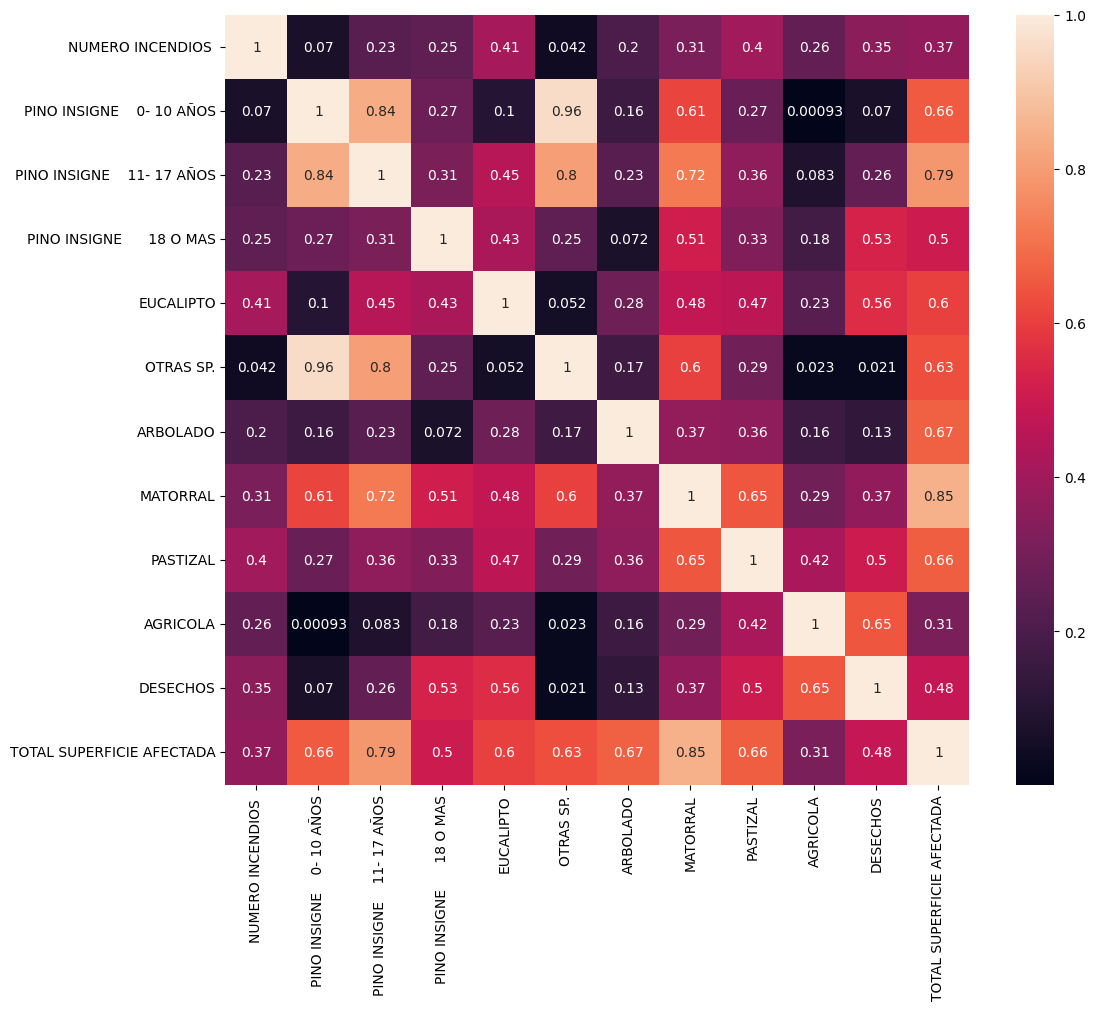

In [138]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_danos_comuna_2014_2015.corr(numeric_only=True), annot=True)

In [139]:
df_danos_comuna_2019_2020

,REGION,COMUNA,NUMERO INCENDIOS,PINO INSIGNE 0- 10 AÑOS,PINO INSIGNE 11- 17 AÑOS,PINO INSIGNE 18 O MAS,EUCALIPTO,OTRAS SP.,ARBOLADO,MATORRAL,PASTIZAL,AGRICOLA,DESECHOS,TOTAL SUPERFICIE AFECTADA
0,XV,ARICA,4.0,0.0,0.0,0.0,0.0,0.0,0.00,0.6,2.63,0.0,0.0,3.23
1,XV,CAMARONES,2.0,0.0,0.0,0.0,0.0,0.0,0.01,0.3,18.19,0.0,0.0,18.50
2,XV,PUTRE,2.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,1.00,0.0,0.0,1.10
3,XV,GENERALLAGOS,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
4,I,IQUIQUE,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,RM,LOBARNECHEA,5.0,0.0,0.0,0.0,0.0,0.0,1.05,4.7,3.11,0.0,0.0,8.86
343,RM,SANMIGUEL,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
344,RM,LACISTERNA,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
345,RM,SANJOAQUIN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00


In [140]:
# Agruparemos por REGION
df_danos_comuna_2019_2020 = df_danos_comuna_2019_2020.groupby(by=['REGION']).sum('TOTAL').reset_index()
df_danos_comuna_2019_2020

,REGION,NUMERO INCENDIOS,PINO INSIGNE 0- 10 AÑOS,PINO INSIGNE 11- 17 AÑOS,PINO INSIGNE 18 O MAS,EUCALIPTO,OTRAS SP.,ARBOLADO,MATORRAL,PASTIZAL,AGRICOLA,DESECHOS,TOTAL SUPERFICIE AFECTADA
0,I,7.0,0.00,0.00,0.00,0.00,0.00,0.03,5.92,0.63,0.00,0.20,6.78
1,II,11.0,0.00,0.00,0.00,0.00,12.06,0.06,14.39,27.74,0.00,0.00,54.26
2,III,32.0,0.00,0.00,0.00,12.06,0.02,13.32,20.02,6.07,0.01,0.00,51.49
3,IV,85.0,0.00,0.00,0.00,17.23,0.01,29.51,131.69,50.78,0.20,0.50,229.92
4,IX,1802.0,1742.16,470.32,2572.16,9363.76,72.74,3314.25,6764.47,5385.06,2966.46,9164.69,41816.06
5,RM,416.0,0.20,0.00,3.25,73.47,1.60,616.50,1180.82,1542.06,16.94,25.26,3460.06
6,V,629.0,8.05,1652.18,197.06,1678.52,1.27,1234.06,2527.23,1460.85,4.32,74.17,8837.66
7,VI,402.0,122.96,137.90,14.40,122.87,6.90,2289.68,1029.77,695.18,53.40,148.29,4621.30
8,VII,1161.0,663.27,292.56,2501.02,190.59,341.98,9570.70,7232.30,1813.67,9.60,665.29,23280.94
9,X,155.0,3.80,0.30,0.01,4.35,0.00,15.53,72.55,5.57,64.50,15.67,182.27


<Axes: title={'center': '-1'}>

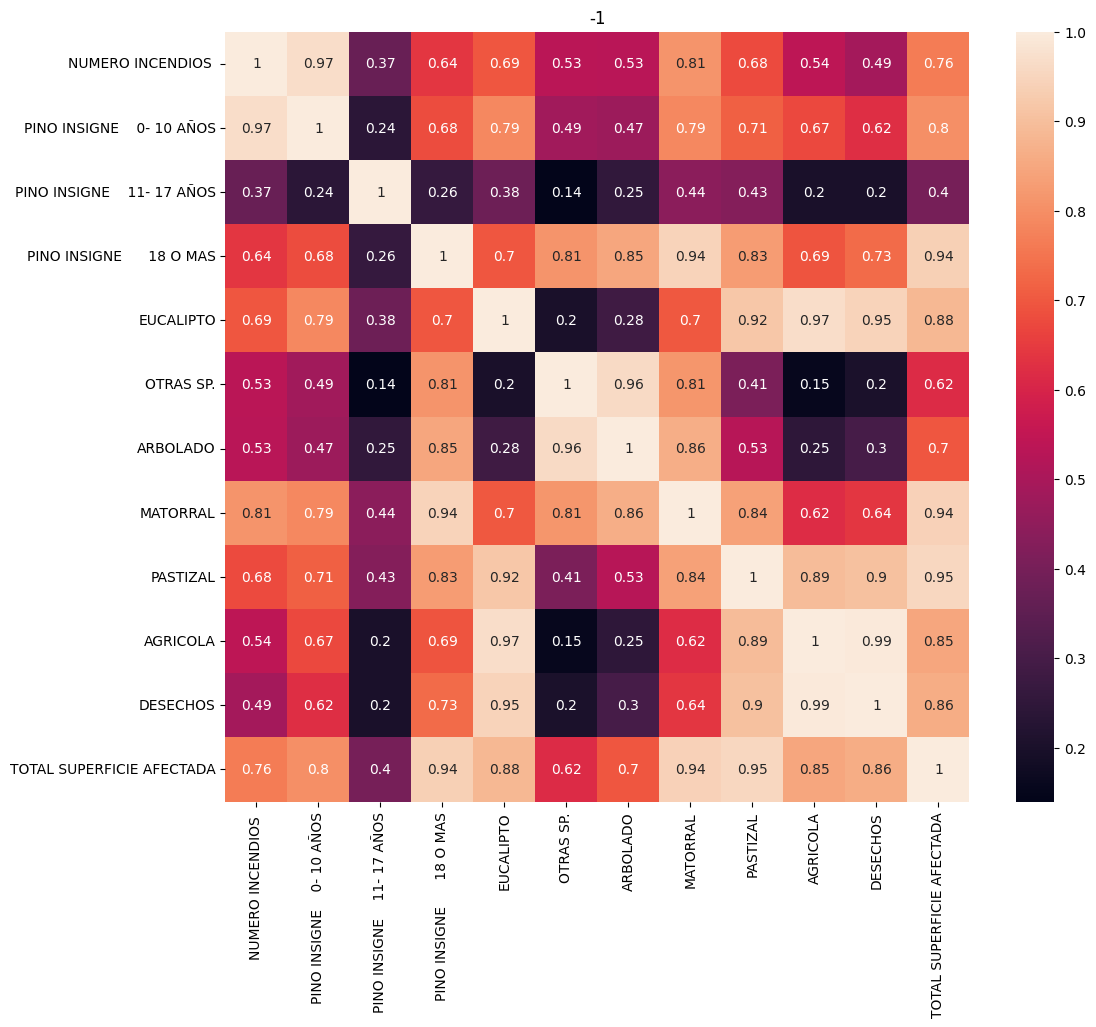

In [141]:
# Haremos el heatmap para ver la correlaciones
plt.figure(figsize=(12, 10))
plt.title(2019 - 2020)
sns.heatmap(df_danos_comuna_2019_2020.corr(numeric_only=True), annot=True)


In [142]:
df_danos_comuna_2020_2021
# Agruparemos por REGION
df_danos_comuna_2020_2021 = df_danos_comuna_2020_2021.groupby(by=['REGION']).sum('TOTAL').reset_index()
df_danos_comuna_2020_2021


,REGION,NUMERO INCENDIOS,PINO INSIGNE 0- 10 AÑOS,PINO INSIGNE 11- 17 AÑOS,PINO INSIGNE 18 O MAS,EUCALIPTO,OTRAS SP.,ARBOLADO,MATORRAL,PASTIZAL,AGRICOLA,DESECHOS,TOTAL SUPERFICIE AFECTADA
0,I,6.0,0.00,0.00,0.00,0.10,0.20,0.60,12.80,14.20,0.00,0.00,27.90
1,II,5.0,0.00,0.00,0.00,0.00,0.00,0.00,1.48,1.73,0.00,0.00,3.21
2,III,12.0,0.00,0.00,0.00,0.02,0.00,0.11,5.42,1.91,0.00,0.04,7.50
3,IV,58.0,0.00,0.00,0.00,13.16,0.00,41.36,110.75,34.55,0.00,0.51,200.33
4,IX,1367.0,852.43,375.19,196.52,2237.81,31.80,510.84,3153.82,1711.70,345.24,2679.25,12094.57
5,RM,352.0,0.50,0.00,0.00,8.30,0.52,241.07,407.96,286.65,0.90,7.51,953.39
6,V,418.0,5.54,12.32,279.76,832.18,11.84,1314.46,2550.89,1930.27,0.97,5.50,6943.73
7,VI,223.0,4.13,1.25,764.60,33.60,6.00,215.38,228.91,228.65,3.58,52.17,1538.20
8,VII,725.0,72.37,4.80,333.42,69.17,2.51,2840.23,927.34,517.70,35.02,99.30,4901.83
9,X,338.0,0.80,2.53,1.05,73.19,0.00,215.23,304.54,56.03,8.92,151.12,813.41


<Axes: title={'center': '-1'}>

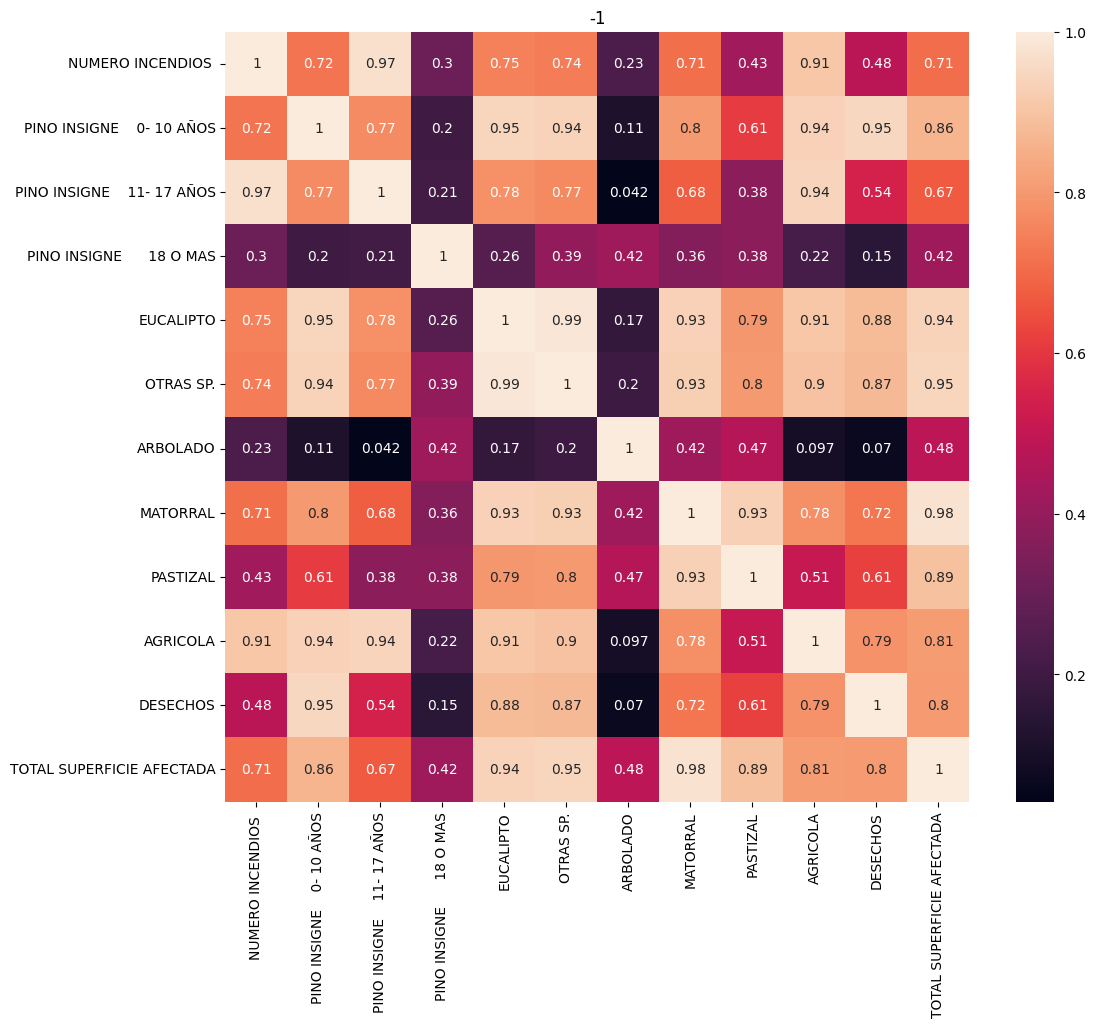

In [143]:
# Heatmap para ver la correlacion
plt.figure(figsize=(12, 10))
plt.title(2020 - 2021)
sns.heatmap(df_danos_comuna_2020_2021.corr(numeric_only=True), annot=True)


In [144]:
# Haremos un heatmpap para 2021 - 2022
df_danos_comuna_2021_2022 = df_danos_comuna_2021_2022.groupby(by=['REGION']).sum('TOTAL').reset_index()
df_danos_comuna_2021_2022

,REGION,NUMERO INCENDIOS,PINO INSIGNE 0- 10 AÑOS,PINO INSIGNE 11- 17 AÑOS,PINO INSIGNE 18 O MAS,EUCALIPTO,OTRAS SP.,ARBOLADO,MATORRAL,PASTIZAL,AGRICOLA,DESECHOS,TOTAL SUPERFICIE AFECTADA
0,I,3.0,0.00,0.00,0.00,0.00,0.00,0.00,1.25,0.15,0.00,0.00,1.40
1,II,3.0,0.00,0.00,0.00,0.00,0.00,0.00,3.00,13.00,0.00,0.00,16.00
2,III,14.0,0.00,0.00,0.00,0.89,0.17,5.20,7.82,5.10,0.30,0.00,19.48
3,IV,59.0,0.00,0.00,0.00,9.70,2.00,773.22,981.90,260.58,5.00,10.23,2042.57
4,IX,1457.0,4504.21,5933.08,4602.31,11578.02,116.16,4308.10,22855.13,3803.18,6185.92,8467.79,72353.89
5,RM,295.0,0.00,20.00,0.30,37.64,1.90,136.19,374.53,307.04,1.51,6.81,885.86
6,V,444.0,2.83,0.83,170.89,200.15,0.16,478.02,868.11,864.02,4.50,34.36,2623.87
7,VI,307.0,52.60,12.85,9.00,190.05,0.05,2922.87,928.67,1296.43,22.19,66.45,5501.09
8,VII,898.0,596.27,97.42,830.68,181.20,17.76,569.25,1024.55,1032.97,67.64,208.55,4626.28
9,X,297.0,78.74,0.15,0.00,27.62,1.26,81.55,261.63,276.45,3.90,25.70,756.99


<Axes: title={'center': '-1'}>

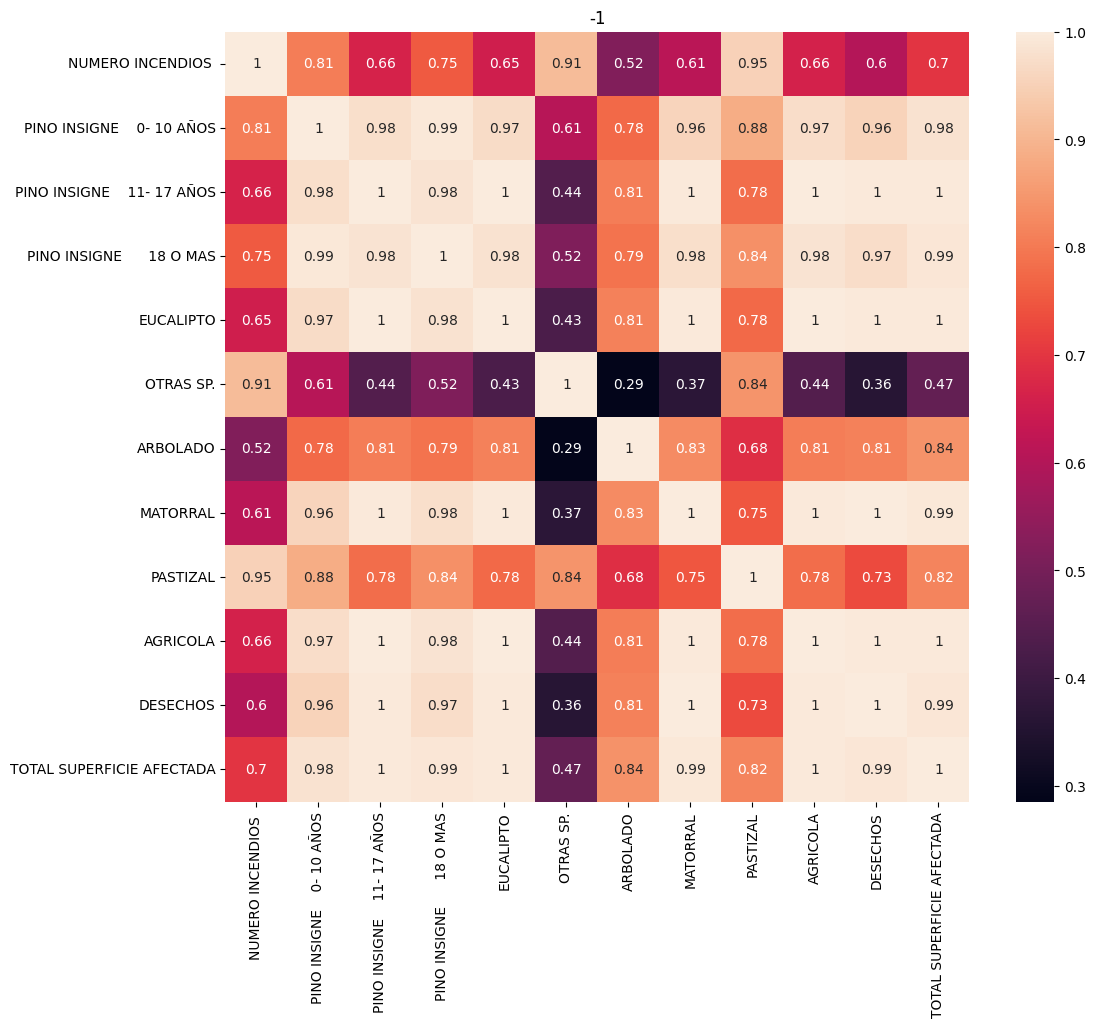

In [145]:
# Heatmap para ver la correlacion
plt.figure(figsize=(12, 10))
plt.title(2021 - 2022)
sns.heatmap(df_danos_comuna_2021_2022.corr(numeric_only=True), annot=True)


In [146]:
df_danos_comuna_2021_2022

,REGION,NUMERO INCENDIOS,PINO INSIGNE 0- 10 AÑOS,PINO INSIGNE 11- 17 AÑOS,PINO INSIGNE 18 O MAS,EUCALIPTO,OTRAS SP.,ARBOLADO,MATORRAL,PASTIZAL,AGRICOLA,DESECHOS,TOTAL SUPERFICIE AFECTADA
0,I,3.0,0.00,0.00,0.00,0.00,0.00,0.00,1.25,0.15,0.00,0.00,1.40
1,II,3.0,0.00,0.00,0.00,0.00,0.00,0.00,3.00,13.00,0.00,0.00,16.00
2,III,14.0,0.00,0.00,0.00,0.89,0.17,5.20,7.82,5.10,0.30,0.00,19.48
3,IV,59.0,0.00,0.00,0.00,9.70,2.00,773.22,981.90,260.58,5.00,10.23,2042.57
4,IX,1457.0,4504.21,5933.08,4602.31,11578.02,116.16,4308.10,22855.13,3803.18,6185.92,8467.79,72353.89
5,RM,295.0,0.00,20.00,0.30,37.64,1.90,136.19,374.53,307.04,1.51,6.81,885.86
6,V,444.0,2.83,0.83,170.89,200.15,0.16,478.02,868.11,864.02,4.50,34.36,2623.87
7,VI,307.0,52.60,12.85,9.00,190.05,0.05,2922.87,928.67,1296.43,22.19,66.45,5501.09
8,VII,898.0,596.27,97.42,830.68,181.20,17.76,569.25,1024.55,1032.97,67.64,208.55,4626.28
9,X,297.0,78.74,0.15,0.00,27.62,1.26,81.55,261.63,276.45,3.90,25.70,756.99


In [147]:
# Crearemos un df unico, el cual tendra la suma de los daños por region en los periodos 2014-2015, 2015-2016, 2016-2017, 2017-2018, 2018-2019, 2019-2020, 2020-2021, 2021-2022 con su año correspondiente
# Agrupamos por region
df_danos_comuna_2014_2015 = df_danos_comuna_2014_2015.groupby(by=['REGION']).sum('TOTAL').reset_index()
# Agregamos Columna con el año correspondiente
df_danos_comuna_2014_2015['AÑO'] = 2015
df_danos_comuna_2014_2015


,REGION,NUMERO INCENDIOS,PINO INSIGNE 0- 10 AÑOS,PINO INSIGNE 11- 17 AÑOS,PINO INSIGNE 18 O MAS,EUCALIPTO,OTRAS SP.,ARBOLADO,MATORRAL,PASTIZAL,AGRICOLA,DESECHOS,TOTAL SUPERFICIE AFECTADA,AÑO
0,III,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015
1,IV,53.0,0.00,0.00,0.00,11.62,3.23,28.60,77.73,26.61,0.00,0.11,147.90,2015
2,IX,1496.0,1823.04,3703.50,4510.30,4687.48,6.27,15124.43,4883.95,4429.95,863.85,5939.14,45971.91,2015
3,RM,442.0,0.00,0.00,0.00,95.00,1.65,450.75,978.21,1184.22,4.57,2.10,2716.50,2015
4,V,865.0,6.43,252.87,90.54,336.61,9.30,894.91,1387.67,1223.58,0.30,35.82,4238.03,2015
5,VI,235.0,34.80,32.60,90.92,291.55,28.65,2648.10,3495.83,3322.58,253.19,32.56,10230.78,2015
6,VII,688.0,4599.96,5450.94,2844.66,697.87,178.04,2311.98,4642.94,2366.70,84.01,319.92,23497.02,2015
7,VIII,3644.0,449.13,6237.58,743.20,5548.47,30.14,7540.41,6326.13,6393.05,345.08,2275.81,35888.99,2015
8,X,433.0,0.60,0.00,88.14,109.43,0.20,2635.15,1530.99,247.84,18.20,302.93,4933.46,2015
9,XI,24.0,0.01,0.00,0.01,0.00,0.00,67.23,145.61,9.79,0.00,10.02,232.67,2015


In [148]:
# Lo mismo
df_danos_comuna_2015_2016 = df_danos_comuna_2015_2016.groupby(by=['REGION']).sum('TOTAL').reset_index()
df_danos_comuna_2015_2016['AÑO'] = 2016
df_danos_comuna_2015_2016


,REGION,NUMERO INCENDIOS,PINO INSIGNE 0- 10 AÑOS,PINO INSIGNE 11- 17 AÑOS,PINO INSIGNE 18 O MAS,EUCALIPTO,OTRAS SP.,ARBOLADO,MATORRAL,PASTIZAL,AGRICOLA,DESECHOS,TOTAL SUPERFICIE AFECTADA,AÑO
0,I,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2016
1,II,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2016
2,III,27.0,0.00,0.00,0.00,13.87,3.92,8.07,74.01,3.73,0.00,0.00,103.60,2016
3,IV,96.0,0.00,0.00,0.00,53.67,0.31,34.52,59.91,39.18,0.00,1.40,188.98,2016
4,IX,1344.0,467.26,371.95,546.88,1340.54,11.50,525.97,1749.41,986.07,1132.95,5098.61,12231.14,2016
5,RM,273.0,0.00,0.00,0.00,173.96,12.50,238.73,689.61,1506.84,50.33,9.71,2681.68,2016
6,V,760.0,2.17,6.51,1.66,169.96,39.06,791.55,1509.95,1601.39,0.47,9.99,4132.71,2016
7,VI,205.0,22.14,13.06,12.12,52.95,4.82,631.29,1296.05,1459.17,89.00,27.34,3607.94,2016
8,VII,796.0,178.85,67.66,124.53,72.27,4.30,84.76,647.68,912.15,66.00,223.27,2381.45,2016
9,VIII,2692.0,521.53,416.89,324.00,1127.17,16.40,559.42,2254.79,1306.01,240.56,1486.35,8253.07,2016


In [149]:
df_danos_comuna_2016_2017 = df_danos_comuna_2016_2017.groupby(by=['REGION']).sum('TOTAL').reset_index()
df_danos_comuna_2016_2017['AÑO'] = 2017
df_danos_comuna_2017_2018 = df_danos_comuna_2017_2018.groupby(by=['REGION']).sum('TOTAL').reset_index()
df_danos_comuna_2017_2018['AÑO'] = 2018
df_danos_comuna_2018_2019 = df_danos_comuna_2018_2019.groupby(by=['REGION']).sum('TOTAL').reset_index()
df_danos_comuna_2018_2019['AÑO'] = 2019
df_danos_comuna_2019_2020 = df_danos_comuna_2019_2020.groupby(by=['REGION']).sum('TOTAL').reset_index()
df_danos_comuna_2019_2020['AÑO'] = 2020
df_danos_comuna_2020_2021 = df_danos_comuna_2020_2021.groupby(by=['REGION']).sum('TOTAL').reset_index()
df_danos_comuna_2020_2021['AÑO'] = 2021
df_danos_comuna_2021_2022 = df_danos_comuna_2021_2022.groupby(by=['REGION']).sum('TOTAL').reset_index()
df_danos_comuna_2021_2022['AÑO'] = 2022



In [152]:
# Hacemos un df unico
df_danos_region = pd.concat([df_danos_comuna_2014_2015, df_danos_comuna_2015_2016, df_danos_comuna_2016_2017, df_danos_comuna_2017_2018, df_danos_comuna_2018_2019, df_danos_comuna_2019_2020, df_danos_comuna_2020_2021, df_danos_comuna_2021_2022])
df_danos_region


,REGION,NUMERO INCENDIOS,PINO INSIGNE 0- 10 AÑOS,PINO INSIGNE 11- 17 AÑOS,PINO INSIGNE 18 O MAS,EUCALIPTO,OTRAS SP.,ARBOLADO,MATORRAL,PASTIZAL,AGRICOLA,DESECHOS,TOTAL SUPERFICIE AFECTADA,AÑO
0,III,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015
1,IV,53.0,0.00,0.00,0.00,11.62,3.23,28.60,77.73,26.61,0.00,0.11,147.90,2015
2,IX,1496.0,1823.04,3703.50,4510.30,4687.48,6.27,15124.43,4883.95,4429.95,863.85,5939.14,45971.91,2015
3,RM,442.0,0.00,0.00,0.00,95.00,1.65,450.75,978.21,1184.22,4.57,2.10,2716.50,2015
4,V,865.0,6.43,252.87,90.54,336.61,9.30,894.91,1387.67,1223.58,0.30,35.82,4238.03,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,XI,35.0,0.00,0.01,0.25,0.00,0.00,41.02,549.50,1100.15,0.00,1.50,1692.43,2022
11,XII,15.0,0.00,0.00,0.00,0.00,43.66,774.79,168.99,191.16,0.00,0.14,1178.75,2022
12,XIV,112.0,0.00,3.67,0.11,212.00,0.20,81.32,51.12,65.42,13.97,57.85,485.64,2022
13,XV,6.0,0.00,0.00,0.00,1.00,1.00,0.50,20.14,5.15,0.00,0.50,28.29,2022


In [176]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Codifica la columna 'REGION' a valores numéricos
le = LabelEncoder()
df_danos_region['REGION'] = le.fit_transform(df_danos_region['REGION'])

# Define la matriz de características X y la variable objetivo y
X = df_danos_region.drop('TOTAL SUPERFICIE AFECTADA', axis=1)
y = df_danos_region['TOTAL SUPERFICIE AFECTADA']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crea un modelo de regresión lineal
model = LinearRegression()

# Entrena el modelo
model.fit(X_train, y_train)

# Evalúa el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')
# Calcula el coeficiente de determinación
r2 = model.score(X_test, y_test)
print(f'Coeficiente de determinación: {r2}')


Error cuadrático medio: 0.3475934555644084
Coeficiente de determinación: 0.9999999998611077


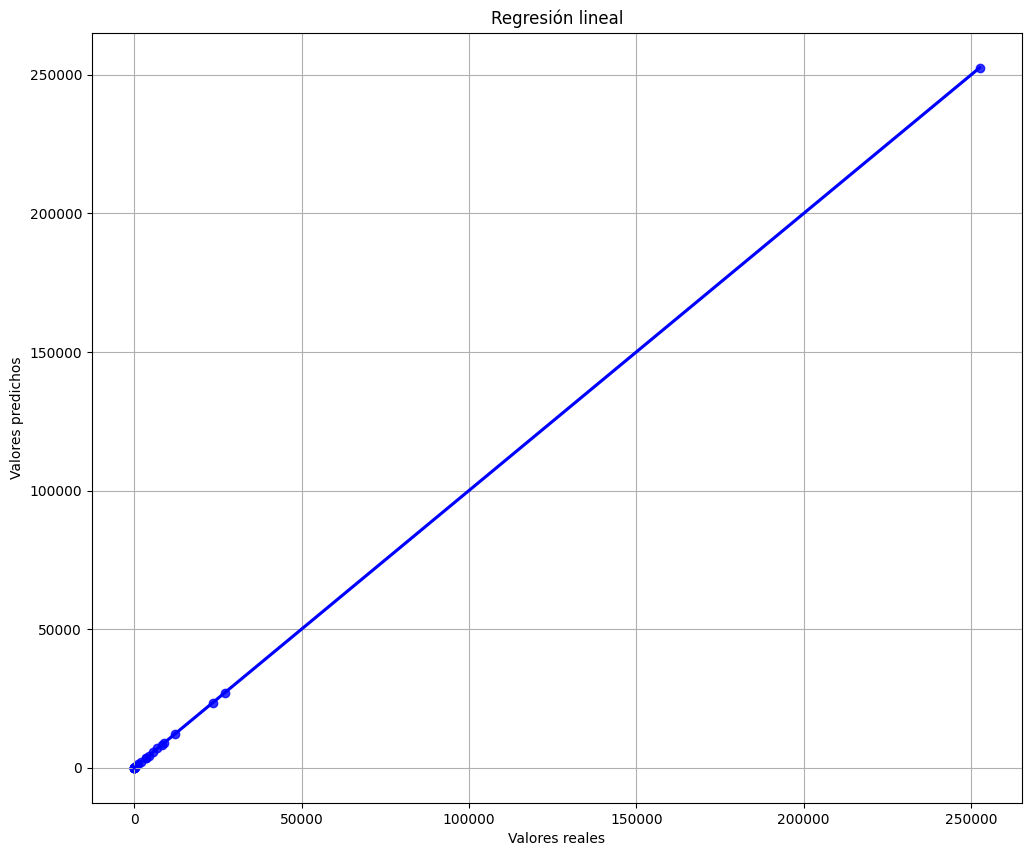

In [177]:
# Graficaremos la regresion lineal
plt.figure(figsize=(12, 10))
plt.title("Regresión lineal")
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)
plt.show()


<Axes: title={'center': 'Correlación'}>

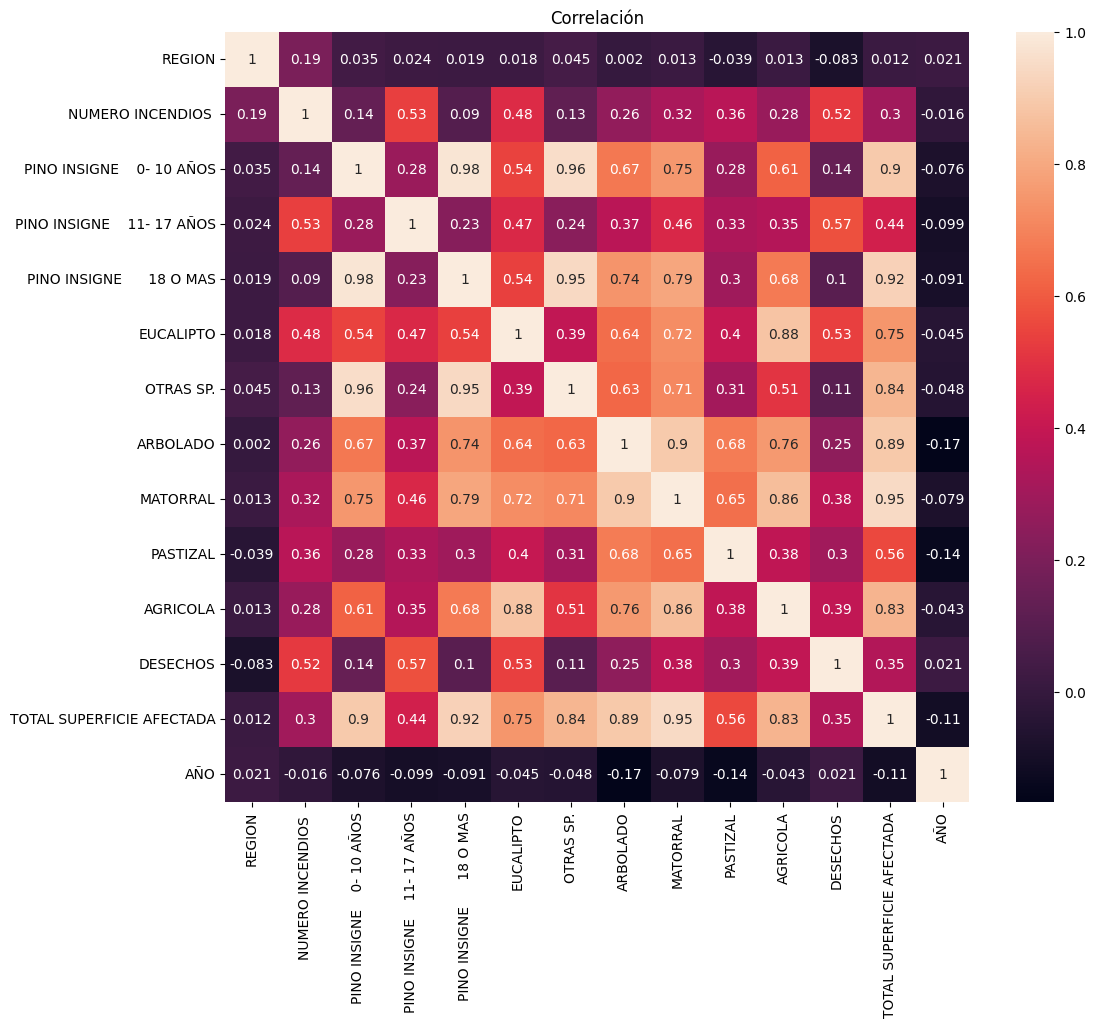

In [178]:
# Heatmpa para ver la correlacion
plt.figure(figsize=(12, 10))
plt.title("Correlación")

sns.heatmap(df_danos_region.corr(numeric_only=True), annot=True)


In [182]:
# De df_danos_region, seleccionamos las columnas que nos interesan para el modelo de regresión lineal (REGION, AÑO, TOTAL SUPERFICIE AFECTADA, NUMERO DE INCENDIOS)
df_danos_region.columns

Index(['REGION', 'NUMERO INCENDIOS ', 'PINO INSIGNE    0- 10 AÑOS',
       'PINO INSIGNE    11- 17 AÑOS', 'PINO INSIGNE      18 O MAS',
       'EUCALIPTO', 'OTRAS SP.', 'ARBOLADO', 'MATORRAL', 'PASTIZAL',
       'AGRICOLA', 'DESECHOS', 'TOTAL SUPERFICIE AFECTADA', 'AÑO'],
      dtype='object')

In [185]:
df_danos_region_2 = df_danos_region[['REGION', 'NUMERO INCENDIOS ', 'TOTAL SUPERFICIE AFECTADA', 'AÑO']]
df_danos_region_2

,REGION,NUMERO INCENDIOS,TOTAL SUPERFICIE AFECTADA,AÑO
0,2,0.0,0.00,2015
1,3,53.0,147.90,2015
2,4,1496.0,45971.91,2015
3,5,442.0,2716.50,2015
4,6,865.0,4238.03,2015
...,...,...,...,...
10,11,35.0,1692.43,2022
11,12,15.0,1178.75,2022
12,13,112.0,485.64,2022
13,14,6.0,28.29,2022


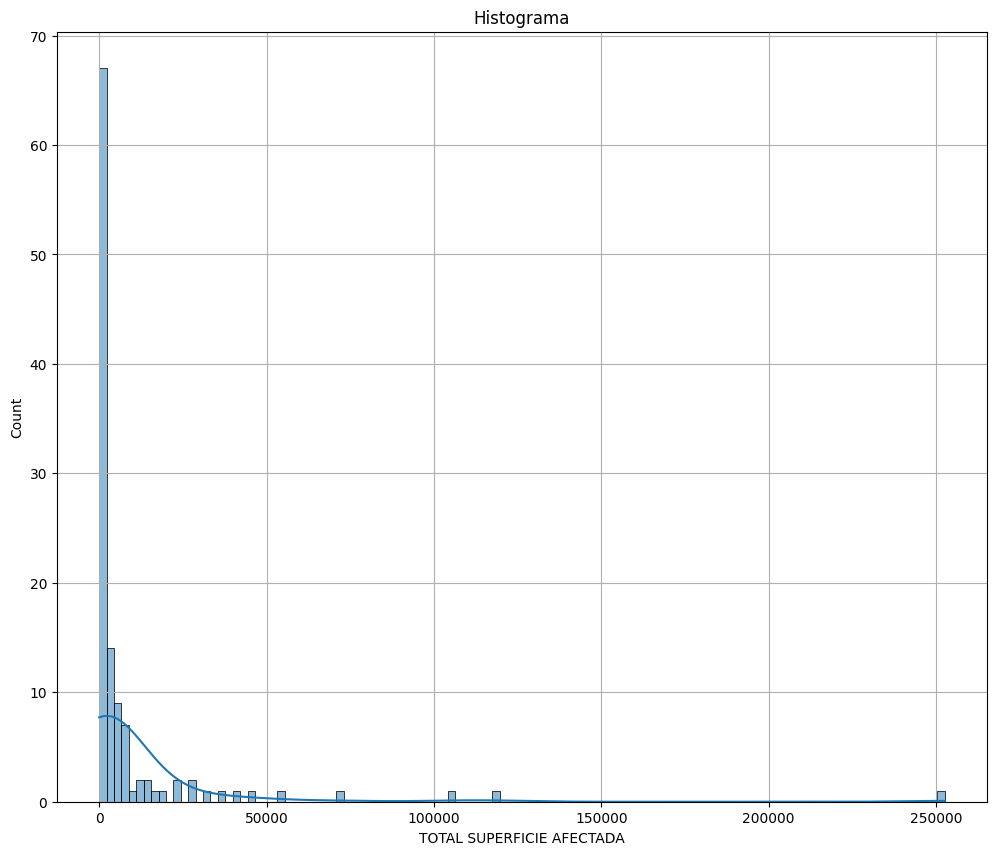

In [187]:
# Haremos un histograma para ver la distribucion de los datos
plt.figure(figsize=(12, 10))
plt.title("Histograma")
sns.histplot(data=df_danos_region_2, x="TOTAL SUPERFICIE AFECTADA", kde=True)
plt.grid(True)
plt.show()


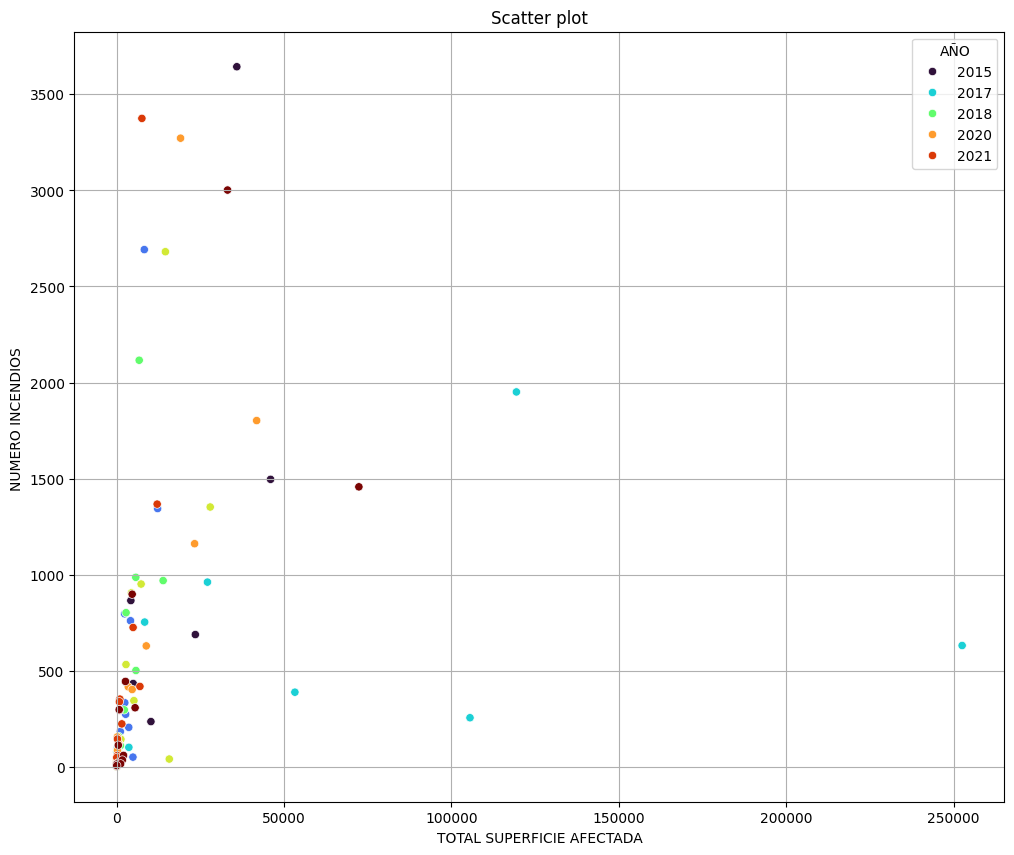

In [192]:
# scatter plot para ver la distribucion de los datos de la columna 'TOTAL SUPERFICIE AFECTADA' y 'NUMERO INCENDIOS ' para cada año (2015-2022), diferenciando por region (1-14)
plt.figure(figsize=(12, 10))
plt.title("Scatter plot")
sns.scatterplot(data=df_danos_region_2, x="TOTAL SUPERFICIE AFECTADA", y="NUMERO INCENDIOS ", hue="AÑO", palette='turbo')
plt.grid(True)
plt.show()
